# LOGISTICS REGRESSION ( SALARY STATUS PREDICTION)

In [1]:
import pandas ahttp://localhost:8888/notebooks/AV_LogisticRegression_SalStat.ipynb#LOGISTICS-REGRESSION-(-SALARY-STATUS-PREDICTION)s pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

C:\Users\dibya\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_csv("Sal_Stat_Data.csv")

In [3]:
df.head()

age       JobType         EdType        maritalstatus       occupation  \
0   45       Private        HS-grad             Divorced     Adm-clerical   
1   24   Federal-gov        HS-grad        Never-married     Armed-Forces   
2   44       Private   Some-college   Married-civ-spouse   Prof-specialty   
3   27       Private            9th        Never-married     Craft-repair   
4   20       Private   Some-college        Never-married            Sales   

      relationship    race   gender  capitalgain  capitalloss  hoursperweek  \
0    Not-in-family   White   Female            0            0            28   
1        Own-child   White     Male            0            0            40   
2          Husband   White     Male            0            0            40   
3   Other-relative   White     Male            0            0            40   
4    Not-in-family   White     Male            0            0            35   

    nativecountry                        SalStat  
0   United-States   less than or equal to 50,000  
1   United-States   less than or equal to 50,000  
2   United-States            greater than 50,000  
3          Mexico   less than or equal to 50,000  
4   United-States   less than or equal to 50,000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [5]:
df.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

# OUTLIER TREATMENT

In [6]:
df_o = df.copy()
df_o.head()

age       JobType         EdType        maritalstatus       occupation  \
0   45       Private        HS-grad             Divorced     Adm-clerical   
1   24   Federal-gov        HS-grad        Never-married     Armed-Forces   
2   44       Private   Some-college   Married-civ-spouse   Prof-specialty   
3   27       Private            9th        Never-married     Craft-repair   
4   20       Private   Some-college        Never-married            Sales   

      relationship    race   gender  capitalgain  capitalloss  hoursperweek  \
0    Not-in-family   White   Female            0            0            28   
1        Own-child   White     Male            0            0            40   
2          Husband   White     Male            0            0            40   
3   Other-relative   White     Male            0            0            40   
4    Not-in-family   White     Male            0            0            35   

    nativecountry                        SalStat  
0   United-States   less than or equal to 50,000  
1   United-States   less than or equal to 50,000  
2   United-States            greater than 50,000  
3          Mexico   less than or equal to 50,000  
4   United-States   less than or equal to 50,000

<AxesSubplot:xlabel='age', ylabel='Density'>

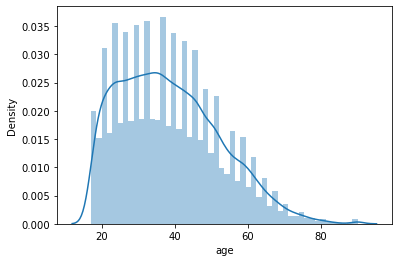

In [7]:
sns.distplot(df['age'])

<AxesSubplot:ylabel='age'>

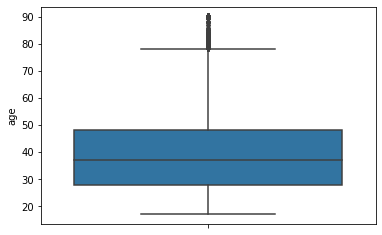

In [8]:
sns.boxplot(y = df_o["age"])

In [9]:
q1 = df["age"].quantile(.25)
q1 

28.0

In [10]:
q3 = df["age"].quantile(.75)
q3

48.0

In [11]:
iqr = q3 - q1
iqr

20.0

In [12]:
lower_fence_age = q1 - (1.5 * iqr)
lower_fence_age

-2.0

In [13]:
upper_fence_age = q3 + (1.5 * iqr)
upper_fence_age

78.0

In [14]:
df.loc[df["age"] < lower_fence_age]

Empty DataFrame
Columns: [age, JobType, EdType, maritalstatus, occupation, relationship, race, gender, capitalgain, capitalloss, hoursperweek, nativecountry, SalStat]
Index: []

The age of a working professional can not be less than 18. So any age below 18 can be considered as an outlier. 

In [15]:
df.loc[df["age"] < 18]

age   JobType    EdType   maritalstatus          occupation  \
8       17         ?      11th   Never-married                   ?   
34      17   Private       9th   Never-married       Other-service   
129     17   Private      11th   Never-married               Sales   
166     17   Private      10th   Never-married       Other-service   
228     17         ?      11th   Never-married                   ?   
...    ...       ...       ...             ...                 ...   
31810   17   Private       9th   Never-married       Other-service   
31873   17   Private   5th-6th   Never-married       Other-service   
31909   17   Private      11th   Never-married       Other-service   
31958   17   Private      11th   Never-married   Handlers-cleaners   
31968   17         ?      11th   Never-married                   ?   

          relationship    race   gender  capitalgain  capitalloss  \
8            Own-child   White   Female            0            0   
34       Not-in-family   White     Male            0            0   
129          Own-child   White     Male            0            0   
166          Own-child   White   Female            0            0   
228          Own-child   White   Female            0            0   
...                ...     ...      ...          ...          ...   
31810        Own-child   White     Male         1055            0   
31873   Other-relative   White     Male            0            0   
31909        Own-child   White     Male            0            0   
31958        Own-child   White     Male         2176            0   
31968        Own-child   White     Male            0            0   

       hoursperweek   nativecountry                        SalStat  
8                 5   United-States   less than or equal to 50,000  
34                6   United-States   less than or equal to 50,000  
129              12   United-States   less than or equal to 50,000  
166              21   United-States   less than or equal to 50,000  
228              20   United-States   less than or equal to 50,000  
...             ...             ...                            ...  
31810            24   United-States   less than or equal to 50,000  
31873            48          Mexico   less than or equal to 50,000  
31909            10   United-States   less than or equal to 50,000  
31958            18   United-States   less than or equal to 50,000  
31968            40   United-States   less than or equal to 50,000  

[393 rows x 13 columns]

In [16]:
df.loc[df["age"] > upper_fence_age]

age            JobType         EdType        maritalstatus  \
469     81   Self-emp-not-inc        HS-grad   Married-civ-spouse   
588     90            Private        HS-grad        Never-married   
713     88   Self-emp-not-inc    Prof-school   Married-civ-spouse   
1465    90            Private      Bachelors   Married-civ-spouse   
1828    90            Private   Some-college        Never-married   
...    ...                ...            ...                  ...   
31448   85            Private      Bachelors   Married-civ-spouse   
31481   82                  ?        HS-grad        Never-married   
31616   79            Private   Some-college   Married-civ-spouse   
31763   90            Private        HS-grad        Never-married   
31967   80                  ?        HS-grad              Widowed   

             occupation     relationship                 race   gender  \
469     Exec-managerial          Husband                White     Male   
588       Other-service    Not-in-family                White   Female   
713      Prof-specialty          Husband                White     Male   
1465    Exec-managerial          Husband                White     Male   
1828      Other-service    Not-in-family   Asian-Pac-Islander     Male   
...                 ...              ...                  ...      ...   
31448   Exec-managerial          Husband                White     Male   
31481                 ?    Not-in-family                White     Male   
31616    Prof-specialty   Other-relative                White     Male   
31763     Other-service    Not-in-family                Black     Male   
31967                 ?    Not-in-family                White     Male   

       capitalgain  capitalloss  hoursperweek   nativecountry  \
469              0            0            30   United-States   
588              0            0            40   United-States   
713              0            0            40   United-States   
1465             0            0            45   United-States   
1828             0            0            35   United-States   
...            ...          ...           ...             ...   
31448            0            0             3          Poland   
31481            0            0             3   United-States   
31616            0            0            20   United-States   
31763            0         2206            40   United-States   
31967            0            0            24   United-States   

                             SalStat  
469     less than or equal to 50,000  
588     less than or equal to 50,000  
713     less than or equal to 50,000  
1465    less than or equal to 50,000  
1828    less than or equal to 50,000  
...                              ...  
31448   less than or equal to 50,000  
31481   less than or equal to 50,000  
31616   less than or equal to 50,000  
31763   less than or equal to 50,000  
31967   less than or equal to 50,000  

[140 rows x 13 columns]

<AxesSubplot:xlabel='hoursperweek', ylabel='Density'>

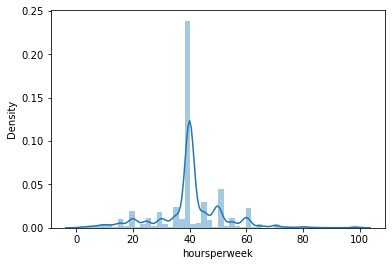

In [17]:
sns.distplot(df['hoursperweek'])

<AxesSubplot:xlabel='hoursperweek'>

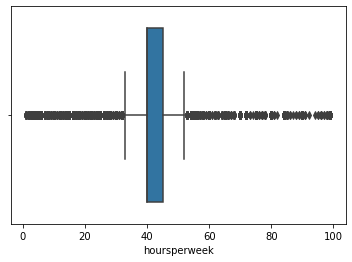

In [18]:
sns.boxplot(df['hoursperweek'])

In [19]:
q1 = df_o['hoursperweek'].quantile(.25)
q3 = df_o['hoursperweek'].quantile(.75)

print(q1, q3)

40.0 45.0


In [20]:
iqr = q3 - q1
iqr

5.0

In [21]:
df_o['hoursperweek'].describe()

count    31978.000000
mean        40.417850
std         12.345285
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hoursperweek, dtype: float64

In [22]:
lower_fence_hr = q1 - 1.5 * (iqr)
upper_fence_hr = q3 + 1.5 * (iqr)

print(lower_fence_hr, upper_fence_hr)

32.5 52.5


In [23]:
df_o = df.loc[(df["age"] > 18) & (df["age"] <= upper_fence_age)]
df_o.head()

age       JobType         EdType        maritalstatus       occupation  \
0   45       Private        HS-grad             Divorced     Adm-clerical   
1   24   Federal-gov        HS-grad        Never-married     Armed-Forces   
2   44       Private   Some-college   Married-civ-spouse   Prof-specialty   
3   27       Private            9th        Never-married     Craft-repair   
4   20       Private   Some-college        Never-married            Sales   

      relationship    race   gender  capitalgain  capitalloss  hoursperweek  \
0    Not-in-family   White   Female            0            0            28   
1        Own-child   White     Male            0            0            40   
2          Husband   White     Male            0            0            40   
3   Other-relative   White     Male            0            0            40   
4    Not-in-family   White     Male            0            0            35   

    nativecountry                        SalStat  
0   United-States   less than or equal to 50,000  
1   United-States   less than or equal to 50,000  
2   United-States            greater than 50,000  
3          Mexico   less than or equal to 50,000  
4   United-States   less than or equal to 50,000

In [24]:
df_o = df_o.loc[(df_o["hoursperweek"] >= lower_fence_hr) & (df_o["hoursperweek"] <= upper_fence_hr)]
df_o.head()

age       JobType         EdType        maritalstatus        occupation  \
1   24   Federal-gov        HS-grad        Never-married      Armed-Forces   
2   44       Private   Some-college   Married-civ-spouse    Prof-specialty   
3   27       Private            9th        Never-married      Craft-repair   
4   20       Private   Some-college        Never-married             Sales   
5   44       Private        HS-grad              Widowed   Exec-managerial   

      relationship    race   gender  capitalgain  capitalloss  hoursperweek  \
1        Own-child   White     Male            0            0            40   
2          Husband   White     Male            0            0            40   
3   Other-relative   White     Male            0            0            40   
4    Not-in-family   White     Male            0            0            35   
5        Unmarried   Black   Female            0            0            40   

    nativecountry                        SalStat  
1   United-States   less than or equal to 50,000  
2   United-States            greater than 50,000  
3          Mexico   less than or equal to 50,000  
4   United-States   less than or equal to 50,000  
5   United-States   less than or equal to 50,000

In [25]:
df_o.shape

(22868, 13)

# HANDLING CATEGORICAL FEATURE

Method-1 One Hot Encoding

In [26]:
df_ob_ohc = pd.get_dummies(df_o, drop_first = True)          # drop_first is used to remove multi-collinearity 
df_ob_ohc.shape

(22868, 98)

Method-2 Take top occurred labels from a column (merely for nominal feature)

In [27]:
df_o.head()

age       JobType         EdType        maritalstatus        occupation  \
1   24   Federal-gov        HS-grad        Never-married      Armed-Forces   
2   44       Private   Some-college   Married-civ-spouse    Prof-specialty   
3   27       Private            9th        Never-married      Craft-repair   
4   20       Private   Some-college        Never-married             Sales   
5   44       Private        HS-grad              Widowed   Exec-managerial   

      relationship    race   gender  capitalgain  capitalloss  hoursperweek  \
1        Own-child   White     Male            0            0            40   
2          Husband   White     Male            0            0            40   
3   Other-relative   White     Male            0            0            40   
4    Not-in-family   White     Male            0            0            35   
5        Unmarried   Black   Female            0            0            40   

    nativecountry                        SalStat  
1   United-States   less than or equal to 50,000  
2   United-States            greater than 50,000  
3          Mexico   less than or equal to 50,000  
4   United-States   less than or equal to 50,000  
5   United-States   less than or equal to 50,000

In [28]:
df_o["nativecountry"].value_counts().head(4).index

Index([' United-States', ' Mexico', ' Philippines', ' Germany'], dtype='object')

In [29]:
# Taking only the top 4 countries

top_4_countries = [i for i in df_o["nativecountry"].value_counts().head(4).index]
top_4_countries

[' United-States', ' Mexico', ' Philippines', ' Germany']

In [30]:
# If the Country is one of the top 4 countries, then put 1, otherwise 0

for i in top_4_countries:
    df_o[i] = np.where(df_o["nativecountry"] == i, 1, 0)    

In [31]:
df_o.head()

age       JobType         EdType        maritalstatus        occupation  \
1   24   Federal-gov        HS-grad        Never-married      Armed-Forces   
2   44       Private   Some-college   Married-civ-spouse    Prof-specialty   
3   27       Private            9th        Never-married      Craft-repair   
4   20       Private   Some-college        Never-married             Sales   
5   44       Private        HS-grad              Widowed   Exec-managerial   

      relationship    race   gender  capitalgain  capitalloss  hoursperweek  \
1        Own-child   White     Male            0            0            40   
2          Husband   White     Male            0            0            40   
3   Other-relative   White     Male            0            0            40   
4    Not-in-family   White     Male            0            0            35   
5        Unmarried   Black   Female            0            0            40   

    nativecountry                        SalStat   United-States   Mexico  \
1   United-States   less than or equal to 50,000               1        0   
2   United-States            greater than 50,000               1        0   
3          Mexico   less than or equal to 50,000               0        1   
4   United-States   less than or equal to 50,000               1        0   
5   United-States   less than or equal to 50,000               1        0   

    Philippines   Germany  
1             0         0  
2             0         0  
3             0         0  
4             0         0  
5             0         0

In [32]:
df_o["JobType"].value_counts()

 Private             16551
 Local-gov            1629
 Self-emp-not-inc     1390
 State-gov             983
 ?                     851
 Federal-gov           815
 Self-emp-inc          642
 Without-pay             4
 Never-worked            3
Name: JobType, dtype: int64

In [33]:
df_o.loc[df_o["JobType"] == " ?", "JobType"].head(100)

17       ?
29       ?
42       ?
44       ?
73       ?
        ..
3092     ?
3126     ?
3197     ?
3238     ?
3241     ?
Name: JobType, Length: 100, dtype: object

In [34]:
df_o["JobType"].mode()[0]

' Private'

In [35]:
# Replacing the '?' values in the 'Job_Type' column, with its mode value 

df_o.loc[df_o["JobType"] == " ?", ["JobType"]] = df_o["JobType"].mode()[0]
df_o["JobType"].value_counts()

 Private             17402
 Local-gov            1629
 Self-emp-not-inc     1390
 State-gov             983
 Federal-gov           815
 Self-emp-inc          642
 Without-pay             4
 Never-worked            3
Name: JobType, dtype: int64

In [36]:
df_o["occupation"].value_counts()

 Craft-repair         3408
 Exec-managerial      3009
 Prof-specialty       2958
 Adm-clerical         2897
 Sales                2278
 Other-service        1815
 Machine-op-inspct    1727
 Transport-moving     1126
 Handlers-cleaners     977
 ?                     854
 Tech-support          725
 Farming-fishing       543
 Protective-serv       483
 Priv-house-serv        61
 Armed-Forces            7
Name: occupation, dtype: int64

In [37]:
# Replacing the '?' values in the 'occupation' column, with its mode value 

df_o.loc[df_o["occupation"] == " ?",["occupation"]] = df_o["occupation"].mode()[0]
df_o["occupation"].value_counts()

 Craft-repair         4262
 Exec-managerial      3009
 Prof-specialty       2958
 Adm-clerical         2897
 Sales                2278
 Other-service        1815
 Machine-op-inspct    1727
 Transport-moving     1126
 Handlers-cleaners     977
 Tech-support          725
 Farming-fishing       543
 Protective-serv       483
 Priv-house-serv        61
 Armed-Forces            7
Name: occupation, dtype: int64

In [38]:
df_o["JobType"].value_counts().head(3).index

Index([' Private', ' Local-gov', ' Self-emp-not-inc'], dtype='object')

In [39]:
# Taking only the top 3 Job Types

top_3_jobs = [i for i in df_o["JobType"].value_counts().head(3).index]
top_3_jobs

[' Private', ' Local-gov', ' Self-emp-not-inc']

In [40]:
# If the Job Type is one of the top 3 Job Types, then put 1, otherwise 0

for i in top_3_jobs:
    df_o[i] = np.where(df_o["JobType"] == i, 1, 0)    

In [41]:
df_o.head()

age       JobType         EdType        maritalstatus        occupation  \
1   24   Federal-gov        HS-grad        Never-married      Armed-Forces   
2   44       Private   Some-college   Married-civ-spouse    Prof-specialty   
3   27       Private            9th        Never-married      Craft-repair   
4   20       Private   Some-college        Never-married             Sales   
5   44       Private        HS-grad              Widowed   Exec-managerial   

      relationship    race   gender  capitalgain  capitalloss  hoursperweek  \
1        Own-child   White     Male            0            0            40   
2          Husband   White     Male            0            0            40   
3   Other-relative   White     Male            0            0            40   
4    Not-in-family   White     Male            0            0            35   
5        Unmarried   Black   Female            0            0            40   

    nativecountry                        SalStat   United-States   Mexico  \
1   United-States   less than or equal to 50,000               1        0   
2   United-States            greater than 50,000               1        0   
3          Mexico   less than or equal to 50,000               0        1   
4   United-States   less than or equal to 50,000               1        0   
5   United-States   less than or equal to 50,000               1        0   

    Philippines   Germany   Private   Local-gov   Self-emp-not-inc  
1             0         0         0           0                  0  
2             0         0         1           0                  0  
3             0         0         1           0                  0  
4             0         0         1           0                  0  
5             0         0         1           0                  0

In [42]:
df_o["occupation"].value_counts()

 Craft-repair         4262
 Exec-managerial      3009
 Prof-specialty       2958
 Adm-clerical         2897
 Sales                2278
 Other-service        1815
 Machine-op-inspct    1727
 Transport-moving     1126
 Handlers-cleaners     977
 Tech-support          725
 Farming-fishing       543
 Protective-serv       483
 Priv-house-serv        61
 Armed-Forces            7
Name: occupation, dtype: int64

In [43]:
# Taking only the top 8 Occupation

top_8_occupation = [i for i in df_o["occupation"].value_counts().head(8).index]
top_8_occupation

[' Craft-repair',
 ' Exec-managerial',
 ' Prof-specialty',
 ' Adm-clerical',
 ' Sales',
 ' Other-service',
 ' Machine-op-inspct',
 ' Transport-moving']

In [44]:
# If the Occupation is one of the top 8 occupations, then put 1, otherwise 0

for i in top_8_occupation:
    df_o[i] = np.where(df_o["occupation"] == i, 1, 0)

In [45]:
df_o.shape

(22868, 28)

In [46]:
df_o["maritalstatus"].value_counts()

 Married-civ-spouse       11104
 Never-married             6704
 Divorced                  3449
 Separated                  765
 Widowed                    542
 Married-spouse-absent      290
 Married-AF-spouse           14
Name: maritalstatus, dtype: int64

In [47]:
# Taking only the top 3 marital status

top_3_maritalstatus = [i for i in df_o["maritalstatus"].value_counts().head(3).index]
top_3_maritalstatus

[' Married-civ-spouse', ' Never-married', ' Divorced']

In [48]:
# If the marital status is one of the top 3 marital statuses, then put 1, otherwise 0

for i in top_3_maritalstatus:
    df_o[i] = np.where(df_o["maritalstatus"] == i, 1, 0)

In [49]:
pd.options.display.max_columns = None

In [50]:
df_o.head()

age       JobType         EdType        maritalstatus        occupation  \
1   24   Federal-gov        HS-grad        Never-married      Armed-Forces   
2   44       Private   Some-college   Married-civ-spouse    Prof-specialty   
3   27       Private            9th        Never-married      Craft-repair   
4   20       Private   Some-college        Never-married             Sales   
5   44       Private        HS-grad              Widowed   Exec-managerial   

      relationship    race   gender  capitalgain  capitalloss  hoursperweek  \
1        Own-child   White     Male            0            0            40   
2          Husband   White     Male            0            0            40   
3   Other-relative   White     Male            0            0            40   
4    Not-in-family   White     Male            0            0            35   
5        Unmarried   Black   Female            0            0            40   

    nativecountry                        SalStat   United-States   Mexico  \
1   United-States   less than or equal to 50,000               1        0   
2   United-States            greater than 50,000               1        0   
3          Mexico   less than or equal to 50,000               0        1   
4   United-States   less than or equal to 50,000               1        0   
5   United-States   less than or equal to 50,000               1        0   

    Philippines   Germany   Private   Local-gov   Self-emp-not-inc  \
1             0         0         0           0                  0   
2             0         0         1           0                  0   
3             0         0         1           0                  0   
4             0         0         1           0                  0   
5             0         0         1           0                  0   

    Craft-repair   Exec-managerial   Prof-specialty   Adm-clerical   Sales  \
1              0                 0                0              0       0   
2              0                 0                1              0       0   
3              1                 0                0              0       0   
4              0                 0                0              0       1   
5              0                 1                0              0       0   

    Other-service   Machine-op-inspct   Transport-moving   Married-civ-spouse  \
1               0                   0                  0                    0   
2               0                   0                  0                    1   
3               0                   0                  0                    0   
4               0                   0                  0                    0   
5               0                   0                  0                    0   

    Never-married   Divorced  
1               1          0  
2               0          0  
3               1          0  
4               1          0  
5               0          0

In [51]:
df_o["relationship"].value_counts()

 Husband           9868
 Not-in-family     6016
 Own-child         2650
 Unmarried         2605
 Wife              1080
 Other-relative     649
Name: relationship, dtype: int64

In [52]:
top_5_relationship = [i for i in df_o["relationship"].value_counts().head(5).index]
top_5_relationship

[' Husband', ' Not-in-family', ' Own-child', ' Unmarried', ' Wife']

In [53]:
for i in top_5_relationship:
    df_o[i] = np.where(df_o["relationship"] == i, 1, 0)

In [54]:
df_o["race"].value_counts()

 White                 19471
 Black                  2296
 Asian-Pac-Islander      691
 Amer-Indian-Eskimo      228
 Other                   182
Name: race, dtype: int64

In [55]:
top_2_race = [i for i in df_o["race"].value_counts().head(2).index]
top_2_race

[' White', ' Black']

In [56]:
for i in top_2_race:
    df_o[i] = np.where(df_o["race"] == i, 1, 0)

In [57]:
pd.options.display.max_columns = None

In [58]:
df_o.head()

age       JobType         EdType        maritalstatus        occupation  \
1   24   Federal-gov        HS-grad        Never-married      Armed-Forces   
2   44       Private   Some-college   Married-civ-spouse    Prof-specialty   
3   27       Private            9th        Never-married      Craft-repair   
4   20       Private   Some-college        Never-married             Sales   
5   44       Private        HS-grad              Widowed   Exec-managerial   

      relationship    race   gender  capitalgain  capitalloss  hoursperweek  \
1        Own-child   White     Male            0            0            40   
2          Husband   White     Male            0            0            40   
3   Other-relative   White     Male            0            0            40   
4    Not-in-family   White     Male            0            0            35   
5        Unmarried   Black   Female            0            0            40   

    nativecountry                        SalStat   United-States   Mexico  \
1   United-States   less than or equal to 50,000               1        0   
2   United-States            greater than 50,000               1        0   
3          Mexico   less than or equal to 50,000               0        1   
4   United-States   less than or equal to 50,000               1        0   
5   United-States   less than or equal to 50,000               1        0   

    Philippines   Germany   Private   Local-gov   Self-emp-not-inc  \
1             0         0         0           0                  0   
2             0         0         1           0                  0   
3             0         0         1           0                  0   
4             0         0         1           0                  0   
5             0         0         1           0                  0   

    Craft-repair   Exec-managerial   Prof-specialty   Adm-clerical   Sales  \
1              0                 0                0              0       0   
2              0                 0                1              0       0   
3              1                 0                0              0       0   
4              0                 0                0              0       1   
5              0                 1                0              0       0   

    Other-service   Machine-op-inspct   Transport-moving   Married-civ-spouse  \
1               0                   0                  0                    0   
2               0                   0                  0                    1   
3               0                   0                  0                    0   
4               0                   0                  0                    0   
5               0                   0                  0                    0   

    Never-married   Divorced   Husband   Not-in-family   Own-child  \
1               1          0         0               0           1   
2               0          0         1               0           0   
3               1          0         0               0           0   
4               1          0         0               1           0   
5               0          0         0               0           0   

    Unmarried   Wife   White   Black  
1           0      0       1       0  
2           0      0       1       0  
3           0      0       1       0  
4           0      0       1       0  
5           1      0       0       1

In [59]:
df_o["gender"].unique()

array([' Male', ' Female'], dtype=object)

In [60]:
# If the gender is Male, replace it with 0 and if it is Female, replace it with 1

df_o["gender"] = df_o["gender"].map({' Male': 0,' Female': 1})
df_o["gender"].unique()

array([0, 1], dtype=int64)

In [61]:
pd.options.display.max_columns = None

In [62]:
df_o.head()

age       JobType         EdType        maritalstatus        occupation  \
1   24   Federal-gov        HS-grad        Never-married      Armed-Forces   
2   44       Private   Some-college   Married-civ-spouse    Prof-specialty   
3   27       Private            9th        Never-married      Craft-repair   
4   20       Private   Some-college        Never-married             Sales   
5   44       Private        HS-grad              Widowed   Exec-managerial   

      relationship    race  gender  capitalgain  capitalloss  hoursperweek  \
1        Own-child   White       0            0            0            40   
2          Husband   White       0            0            0            40   
3   Other-relative   White       0            0            0            40   
4    Not-in-family   White       0            0            0            35   
5        Unmarried   Black       1            0            0            40   

    nativecountry                        SalStat   United-States   Mexico  \
1   United-States   less than or equal to 50,000               1        0   
2   United-States            greater than 50,000               1        0   
3          Mexico   less than or equal to 50,000               0        1   
4   United-States   less than or equal to 50,000               1        0   
5   United-States   less than or equal to 50,000               1        0   

    Philippines   Germany   Private   Local-gov   Self-emp-not-inc  \
1             0         0         0           0                  0   
2             0         0         1           0                  0   
3             0         0         1           0                  0   
4             0         0         1           0                  0   
5             0         0         1           0                  0   

    Craft-repair   Exec-managerial   Prof-specialty   Adm-clerical   Sales  \
1              0                 0                0              0       0   
2              0                 0                1              0       0   
3              1                 0                0              0       0   
4              0                 0                0              0       1   
5              0                 1                0              0       0   

    Other-service   Machine-op-inspct   Transport-moving   Married-civ-spouse  \
1               0                   0                  0                    0   
2               0                   0                  0                    1   
3               0                   0                  0                    0   
4               0                   0                  0                    0   
5               0                   0                  0                    0   

    Never-married   Divorced   Husband   Not-in-family   Own-child  \
1               1          0         0               0           1   
2               0          0         1               0           0   
3               1          0         0               0           0   
4               1          0         0               1           0   
5               0          0         0               0           0   

    Unmarried   Wife   White   Black  
1           0      0       1       0  
2           0      0       1       0  
3           0      0       1       0  
4           0      0       1       0  
5           1      0       0       1

In [63]:
df_o['SalStat'].unique()

array([' less than or equal to 50,000', ' greater than 50,000'],
      dtype=object)

In [64]:
# If the SalStat is less than or equal to 50,000, replace it with 0 and if it is greater than 50,000, replace it with 1

df_o['SalStat'] = df_o['SalStat'].map({' less than or equal to 50,000': 0, ' greater than 50,000': 1})
df_o['SalStat'].unique()

array([0, 1], dtype=int64)

In [65]:
pd.options.display.max_columns = None

In [66]:
df_o.head()

age       JobType         EdType        maritalstatus        occupation  \
1   24   Federal-gov        HS-grad        Never-married      Armed-Forces   
2   44       Private   Some-college   Married-civ-spouse    Prof-specialty   
3   27       Private            9th        Never-married      Craft-repair   
4   20       Private   Some-college        Never-married             Sales   
5   44       Private        HS-grad              Widowed   Exec-managerial   

      relationship    race  gender  capitalgain  capitalloss  hoursperweek  \
1        Own-child   White       0            0            0            40   
2          Husband   White       0            0            0            40   
3   Other-relative   White       0            0            0            40   
4    Not-in-family   White       0            0            0            35   
5        Unmarried   Black       1            0            0            40   

    nativecountry  SalStat   United-States   Mexico   Philippines   Germany  \
1   United-States        0               1        0             0         0   
2   United-States        1               1        0             0         0   
3          Mexico        0               0        1             0         0   
4   United-States        0               1        0             0         0   
5   United-States        0               1        0             0         0   

    Private   Local-gov   Self-emp-not-inc   Craft-repair   Exec-managerial  \
1         0           0                  0              0                 0   
2         1           0                  0              0                 0   
3         1           0                  0              1                 0   
4         1           0                  0              0                 0   
5         1           0                  0              0                 1   

    Prof-specialty   Adm-clerical   Sales   Other-service   Machine-op-inspct  \
1                0              0       0               0                   0   
2                1              0       0               0                   0   
3                0              0       0               0                   0   
4                0              0       1               0                   0   
5                0              0       0               0                   0   

    Transport-moving   Married-civ-spouse   Never-married   Divorced  \
1                  0                    0               1          0   
2                  0                    1               0          0   
3                  0                    0               1          0   
4                  0                    0               1          0   
5                  0                    0               0          0   

    Husband   Not-in-family   Own-child   Unmarried   Wife   White   Black  
1         0               0           1           0      0       1       0  
2         1               0           0           0      0       1       0  
3         0               0           0           0      0       1       0  
4         0               1           0           0      0       1       0  
5         0               0           0           1      0       0       1

 Method-2 Ordinal Encoding ( merely for Ordinal feature)

In [67]:
df_o["EdType"].value_counts()

 HS-grad         7828
 Some-college    4850
 Bachelors       3931
 Masters         1228
 Assoc-voc       1077
 Assoc-acdm       771
 11th             603
 10th             567
 7th-8th          424
 9th              373
 Prof-school      334
 12th             251
 Doctorate        244
 5th-6th          243
 1st-4th          112
 Preschool         32
Name: EdType, dtype: int64

In [68]:
df_o["EdType"].unique()

array([' HS-grad', ' Some-college', ' 9th', ' Assoc-voc', ' Assoc-acdm',
       ' Bachelors', ' 1st-4th', ' Masters', ' 10th', ' 12th', ' 5th-6th',
       ' 11th', ' Prof-school', ' Doctorate', ' 7th-8th', ' Preschool'],
      dtype=object)

In [69]:
dict_EdType = {' Preschool': 1, ' 1st-4th': 2,' 5th-6th': 3, ' 7th-8th': 4, ' 9th': 5, ' 10th': 6, ' 11th': 7, ' 12th': 8, ' HS-grad': 9, ' Prof-school': 10, ' Assoc-voc': 11, ' Assoc-acdm': 12, ' Some-college': 13, ' Bachelors': 13, ' Masters': 14, ' Doctorate': 15}
dict_EdType

{' Preschool': 1,
 ' 1st-4th': 2,
 ' 5th-6th': 3,
 ' 7th-8th': 4,
 ' 9th': 5,
 ' 10th': 6,
 ' 11th': 7,
 ' 12th': 8,
 ' HS-grad': 9,
 ' Prof-school': 10,
 ' Assoc-voc': 11,
 ' Assoc-acdm': 12,
 ' Some-college': 13,
 ' Bachelors': 13,
 ' Masters': 14,
 ' Doctorate': 15}

In [70]:
df_o["EdType"] = df_o['EdType'].map(dict_EdType)
df_o["EdType"]

1         9
2        13
3         5
4        13
5         9
         ..
31972    14
31974    13
31975    13
31976    13
31977    13
Name: EdType, Length: 22868, dtype: int64

In [71]:
df_o.head()

age       JobType  EdType        maritalstatus        occupation  \
1   24   Federal-gov       9        Never-married      Armed-Forces   
2   44       Private      13   Married-civ-spouse    Prof-specialty   
3   27       Private       5        Never-married      Craft-repair   
4   20       Private      13        Never-married             Sales   
5   44       Private       9              Widowed   Exec-managerial   

      relationship    race  gender  capitalgain  capitalloss  hoursperweek  \
1        Own-child   White       0            0            0            40   
2          Husband   White       0            0            0            40   
3   Other-relative   White       0            0            0            40   
4    Not-in-family   White       0            0            0            35   
5        Unmarried   Black       1            0            0            40   

    nativecountry  SalStat   United-States   Mexico   Philippines   Germany  \
1   United-States        0               1        0             0         0   
2   United-States        1               1        0             0         0   
3          Mexico        0               0        1             0         0   
4   United-States        0               1        0             0         0   
5   United-States        0               1        0             0         0   

    Private   Local-gov   Self-emp-not-inc   Craft-repair   Exec-managerial  \
1         0           0                  0              0                 0   
2         1           0                  0              0                 0   
3         1           0                  0              1                 0   
4         1           0                  0              0                 0   
5         1           0                  0              0                 1   

    Prof-specialty   Adm-clerical   Sales   Other-service   Machine-op-inspct  \
1                0              0       0               0                   0   
2                1              0       0               0                   0   
3                0              0       0               0                   0   
4                0              0       1               0                   0   
5                0              0       0               0                   0   

    Transport-moving   Married-civ-spouse   Never-married   Divorced  \
1                  0                    0               1          0   
2                  0                    1               0          0   
3                  0                    0               1          0   
4                  0                    0               1          0   
5                  0                    0               0          0   

    Husband   Not-in-family   Own-child   Unmarried   Wife   White   Black  
1         0               0           1           0      0       1       0  
2         1               0           0           0      0       1       0  
3         0               0           0           0      0       1       0  
4         0               1           0           0      0       1       0  
5         0               0           0           1      0       0       1

In [72]:
df_o.isnull().sum()

age                    0
JobType                0
EdType                 0
maritalstatus          0
occupation             0
relationship           0
race                   0
gender                 0
capitalgain            0
capitalloss            0
hoursperweek           0
nativecountry          0
SalStat                0
 United-States         0
 Mexico                0
 Philippines           0
 Germany               0
 Private               0
 Local-gov             0
 Self-emp-not-inc      0
 Craft-repair          0
 Exec-managerial       0
 Prof-specialty        0
 Adm-clerical          0
 Sales                 0
 Other-service         0
 Machine-op-inspct     0
 Transport-moving      0
 Married-civ-spouse    0
 Never-married         0
 Divorced              0
 Husband               0
 Not-in-family         0
 Own-child             0
 Unmarried             0
 Wife                  0
 White                 0
 Black                 0
dtype: int64

In [73]:
pd.set_option("display.max_columns", None)

In [74]:
df_o.corr(method = "spearman")

age    EdType    gender  capitalgain  capitalloss  \
age                  1.000000  0.001766 -0.069993     0.106703     0.059479   
EdType               0.001766  1.000000  0.038162     0.074329     0.057985   
gender              -0.069993  0.038162  1.000000    -0.059124    -0.044698   
capitalgain          0.106703  0.074329 -0.059124     1.000000    -0.067941   
capitalloss          0.059479  0.057985 -0.044698    -0.067941     1.000000   
hoursperweek         0.053724  0.107917 -0.192778     0.071542     0.037118   
SalStat              0.267379  0.260939 -0.208201     0.274287     0.131804   
 United-States       0.030592  0.097107 -0.004908     0.027159     0.017279   
 Mexico             -0.068758 -0.164685 -0.028216    -0.031405    -0.026551   
 Philippines         0.006231  0.030390  0.011652    -0.002594     0.008796   
 Germany            -0.002207  0.023423  0.005794    -0.003979    -0.002135   
 Private            -0.183805 -0.148403  0.042182    -0.044498    -0.032386   
 Local-gov           0.068086  0.107049  0.041970     0.007239     0.018877   
 Self-emp-not-inc    0.101743 -0.006285 -0.094655     0.023728     0.018087   
 Craft-repair        0.003960 -0.172647 -0.187503    -0.022913    -0.005982   
 Exec-managerial     0.096825  0.203513 -0.009264     0.060892     0.041037   
 Prof-specialty      0.054318  0.322877  0.042932     0.070368     0.045612   
 Adm-clerical       -0.031693  0.032112  0.289189    -0.029040    -0.023783   
 Sales              -0.014644  0.062458 -0.008361     0.020499     0.012327   
 Other-service      -0.054318 -0.127354  0.129199    -0.057119    -0.035774   
 Machine-op-inspct  -0.020862 -0.185439 -0.030055    -0.020883    -0.020366   
 Transport-moving    0.025011 -0.133460 -0.125200    -0.015892    -0.004200   
 Married-civ-spouse  0.295002  0.014102 -0.440705     0.114613     0.071564   
 Never-married      -0.505659  0.040591  0.161826    -0.084047    -0.053255   
 Divorced            0.150054 -0.012701  0.266760    -0.032617    -0.019477   
 Husband             0.299191  0.010952 -0.587610     0.098090     0.070312   
 Not-in-family      -0.079432  0.049670  0.187485    -0.037448    -0.018198   
 Own-child          -0.361243 -0.009386  0.067212    -0.071884    -0.049486   
 Unmarried           0.041799 -0.051034  0.347095    -0.040906    -0.033389   
 Wife                0.011239  0.021248  0.329557     0.037912     0.008667   
 White               0.020251  0.043633 -0.120784     0.027992     0.024389   
 Black              -0.006097 -0.060191  0.130814    -0.028449    -0.025926   

                     hoursperweek   SalStat   United-States    Mexico  \
age                      0.053724  0.267379        0.030592 -0.068758   
EdType                   0.107917  0.260939        0.097107 -0.164685   
gender                  -0.192778 -0.208201       -0.004908 -0.028216   
capitalgain              0.071542  0.274287        0.027159 -0.031405   
capitalloss              0.037118  0.131804        0.017279 -0.026551   
hoursperweek             1.000000  0.191393        0.050932 -0.038618   
SalStat                  0.191393  1.000000        0.047039 -0.071410   
 United-States           0.050932  0.047039        1.000000 -0.473317   
 Mexico                 -0.038618 -0.071410       -0.473317  1.000000   
 Philippines            -0.025158  0.016980       -0.263555 -0.012574   
 Germany                 0.021908  0.013007       -0.207691 -0.009909   
 Private                -0.022356 -0.114019       -0.055998  0.055613   
 Local-gov              -0.033702  0.035393        0.032518 -0.024264   
 Self-emp-not-inc        0.076608  0.025320        0.014773 -0.015811   
 Craft-repair           -0.021131 -0.053503        0.002440  0.013664   
 Exec-managerial         0.131671  0.195936        0.038363 -0.047931   
 Prof-specialty          0.049091  0.183090        0.013491 -0.046395   
 Adm-clerical           -0.115595 -0.094791        0.022006 -0.028606   
 Sales                   0.0746

In [75]:
df_o.corr(method = "spearman")[6 : 7]

age    EdType    gender  capitalgain  capitalloss  hoursperweek  \
SalStat  0.267379  0.260939 -0.208201     0.274287     0.131804      0.191393   

         SalStat   United-States   Mexico   Philippines   Germany   Private  \
SalStat      1.0        0.047039 -0.07141       0.01698  0.013007 -0.114019   

          Local-gov   Self-emp-not-inc   Craft-repair   Exec-managerial  \
SalStat    0.035393            0.02532      -0.053503          0.195936   

          Prof-specialty   Adm-clerical     Sales   Other-service  \
SalStat          0.18309      -0.094791  0.035431       -0.139472   

          Machine-op-inspct   Transport-moving   Married-civ-spouse  \
SalStat           -0.082242          -0.030806              0.43555   

          Never-married   Divorced   Husband   Not-in-family   Own-child  \
SalStat       -0.298756  -0.150995  0.388794       -0.209586   -0.195854   

          Unmarried      Wife    White     Black  
SalStat   -0.159666  0.126494  0.08995 -0.093397

While calculating correlation, if both the independent and dependent varaibles are numerical, then we will get good result. But if they are categorical, it will not be very accuarte. 

# FEATURE SELECTION

In [76]:
df_o.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat', ' United-States', ' Mexico',
       ' Philippines', ' Germany', ' Private', ' Local-gov',
       ' Self-emp-not-inc', ' Craft-repair', ' Exec-managerial',
       ' Prof-specialty', ' Adm-clerical', ' Sales', ' Other-service',
       ' Machine-op-inspct', ' Transport-moving', ' Married-civ-spouse',
       ' Never-married', ' Divorced', ' Husband', ' Not-in-family',
       ' Own-child', ' Unmarried', ' Wife', ' White', ' Black'],
      dtype='object')

In [77]:
df_o = df_o.drop(['JobType', 'maritalstatus', 'occupation', 'relationship', 'race', "nativecountry"], axis = 1)
df_o.head()

age  EdType  gender  capitalgain  capitalloss  hoursperweek  SalStat  \
1   24       9       0            0            0            40        0   
2   44      13       0            0            0            40        1   
3   27       5       0            0            0            40        0   
4   20      13       0            0            0            35        0   
5   44       9       1            0            0            40        0   

    United-States   Mexico   Philippines   Germany   Private   Local-gov  \
1               1        0             0         0         0           0   
2               1        0             0         0         1           0   
3               0        1             0         0         1           0   
4               1        0             0         0         1           0   
5               1        0             0         0         1           0   

    Self-emp-not-inc   Craft-repair   Exec-managerial   Prof-specialty  \
1                  0              0                 0                0   
2                  0              0                 0                1   
3                  0              1                 0                0   
4                  0              0                 0                0   
5                  0              0                 1                0   

    Adm-clerical   Sales   Other-service   Machine-op-inspct  \
1              0       0               0                   0   
2              0       0               0                   0   
3              0       0               0                   0   
4              0       1               0                   0   
5              0       0               0                   0   

    Transport-moving   Married-civ-spouse   Never-married   Divorced  \
1                  0                    0               1          0   
2                  0                    1               0          0   
3                  0                    0               1          0   
4                  0                    0               1          0   
5                  0                    0               0          0   

    Husband   Not-in-family   Own-child   Unmarried   Wife   White   Black  
1         0               0           1           0      0       1       0  
2         1               0           0           0      0       1       0  
3         0               0           0           0      0       1       0  
4         0               1           0           0      0       1       0  
5         0               0           0           1      0       0       1

# EMBEDDED METHOD (Feature Importance test )

In [78]:
from sklearn.ensemble import ExtraTreesClassifier

In [79]:
x = df_o.drop(["SalStat"], axis = 1)   # independent varaiables
x.head()

age  EdType  gender  capitalgain  capitalloss  hoursperweek  \
1   24       9       0            0            0            40   
2   44      13       0            0            0            40   
3   27       5       0            0            0            40   
4   20      13       0            0            0            35   
5   44       9       1            0            0            40   

    United-States   Mexico   Philippines   Germany   Private   Local-gov  \
1               1        0             0         0         0           0   
2               1        0             0         0         1           0   
3               0        1             0         0         1           0   
4               1        0             0         0         1           0   
5               1        0             0         0         1           0   

    Self-emp-not-inc   Craft-repair   Exec-managerial   Prof-specialty  \
1                  0              0                 0                0   
2                  0              0                 0                1   
3                  0              1                 0                0   
4                  0              0                 0                0   
5                  0              0                 1                0   

    Adm-clerical   Sales   Other-service   Machine-op-inspct  \
1              0       0               0                   0   
2              0       0               0                   0   
3              0       0               0                   0   
4              0       1               0                   0   
5              0       0               0                   0   

    Transport-moving   Married-civ-spouse   Never-married   Divorced  \
1                  0                    0               1          0   
2                  0                    1               0          0   
3                  0                    0               1          0   
4                  0                    0               1          0   
5                  0                    0               0          0   

    Husband   Not-in-family   Own-child   Unmarried   Wife   White   Black  
1         0               0           1           0      0       1       0  
2         1               0           0           0      0       1       0  
3         0               0           0           0      0       1       0  
4         0               1           0           0      0       1       0  
5         0               0           0           1      0       0       1

In [80]:
y = df_o["SalStat"]    # dependent varaiable
y.head()

1    0
2    1
3    0
4    0
5    0
Name: SalStat, dtype: int64

In [81]:
etc = ExtraTreesClassifier(n_estimators = 500)
etc.fit(x, y)

ExtraTreesClassifier(n_estimators=500)

In [82]:
etc_score = etc.feature_importances_ * 100
etc_score

array([26.5336841 , 11.34098699,  1.56550631,  9.76667249,  3.11640215,
        7.92234231,  0.97348415,  0.38747107,  0.18755291,  0.16730727,
        1.44823048,  0.77613419,  1.01231158,  0.98292035,  3.07717399,
        3.41267732,  0.64189943,  0.82362642,  0.97604985,  0.67339619,
        0.58203634,  8.27623086,  3.01776281,  0.92629451,  5.37770505,
        1.49029937,  0.91976955,  0.73786074,  1.40351062,  0.89520137,
        0.58749921])

In [83]:
score_ETC = pd.DataFrame(etc_score)
score_ETC

0
0   26.533684
1   11.340987
2    1.565506
3    9.766672
4    3.116402
5    7.922342
6    0.973484
7    0.387471
8    0.187553
9    0.167307
10   1.448230
11   0.776134
12   1.012312
13   0.982920
14   3.077174
15   3.412677
16   0.641899
17   0.823626
18   0.976050
19   0.673396
20   0.582036
21   8.276231
22   3.017763
23   0.926295
24   5.377705
25   1.490299
26   0.919770
27   0.737861
28   1.403511
29   0.895201
30   0.587499

In [84]:
x.columns

Index(['age', 'EdType', 'gender', 'capitalgain', 'capitalloss', 'hoursperweek',
       ' United-States', ' Mexico', ' Philippines', ' Germany', ' Private',
       ' Local-gov', ' Self-emp-not-inc', ' Craft-repair', ' Exec-managerial',
       ' Prof-specialty', ' Adm-clerical', ' Sales', ' Other-service',
       ' Machine-op-inspct', ' Transport-moving', ' Married-civ-spouse',
       ' Never-married', ' Divorced', ' Husband', ' Not-in-family',
       ' Own-child', ' Unmarried', ' Wife', ' White', ' Black'],
      dtype='object')

In [85]:
cols = x.columns
feature_ETC = pd.DataFrame(cols)
feature_ETC

0
0                   age
1                EdType
2                gender
3           capitalgain
4           capitalloss
5          hoursperweek
6         United-States
7                Mexico
8           Philippines
9               Germany
10              Private
11            Local-gov
12     Self-emp-not-inc
13         Craft-repair
14      Exec-managerial
15       Prof-specialty
16         Adm-clerical
17                Sales
18        Other-service
19    Machine-op-inspct
20     Transport-moving
21   Married-civ-spouse
22        Never-married
23             Divorced
24              Husband
25        Not-in-family
26            Own-child
27            Unmarried
28                 Wife
29                White
30                Black

In [86]:
Final_score_ETC = pd.concat([feature_ETC, score_ETC], axis = 1)
Final_score_ETC.columns = ["features", "ETC_score"]

Final_score_ETC

features  ETC_score
0                   age  26.533684
1                EdType  11.340987
2                gender   1.565506
3           capitalgain   9.766672
4           capitalloss   3.116402
5          hoursperweek   7.922342
6         United-States   0.973484
7                Mexico   0.387471
8           Philippines   0.187553
9               Germany   0.167307
10              Private   1.448230
11            Local-gov   0.776134
12     Self-emp-not-inc   1.012312
13         Craft-repair   0.982920
14      Exec-managerial   3.077174
15       Prof-specialty   3.412677
16         Adm-clerical   0.641899
17                Sales   0.823626
18        Other-service   0.976050
19    Machine-op-inspct   0.673396
20     Transport-moving   0.582036
21   Married-civ-spouse   8.276231
22        Never-married   3.017763
23             Divorced   0.926295
24              Husband   5.377705
25        Not-in-family   1.490299
26            Own-child   0.919770
27            Unmarried   0.737861
28                 Wife   1.403511
29                White   0.895201
30                Black   0.587499

In [87]:
Final_score_ETC.reset_index(drop = True)

features  ETC_score
0                   age  26.533684
1                EdType  11.340987
2                gender   1.565506
3           capitalgain   9.766672
4           capitalloss   3.116402
5          hoursperweek   7.922342
6         United-States   0.973484
7                Mexico   0.387471
8           Philippines   0.187553
9               Germany   0.167307
10              Private   1.448230
11            Local-gov   0.776134
12     Self-emp-not-inc   1.012312
13         Craft-repair   0.982920
14      Exec-managerial   3.077174
15       Prof-specialty   3.412677
16         Adm-clerical   0.641899
17                Sales   0.823626
18        Other-service   0.976050
19    Machine-op-inspct   0.673396
20     Transport-moving   0.582036
21   Married-civ-spouse   8.276231
22        Never-married   3.017763
23             Divorced   0.926295
24              Husband   5.377705
25        Not-in-family   1.490299
26            Own-child   0.919770
27            Unmarried   0.737861
28                 Wife   1.403511
29                White   0.895201
30                Black   0.587499

In [88]:
# only 14 highest scoring features are taken

q = Final_score_ETC.nlargest(14, "ETC_score")
q

features  ETC_score
0                   age  26.533684
1                EdType  11.340987
3           capitalgain   9.766672
21   Married-civ-spouse   8.276231
5          hoursperweek   7.922342
24              Husband   5.377705
15       Prof-specialty   3.412677
4           capitalloss   3.116402
14      Exec-managerial   3.077174
22        Never-married   3.017763
2                gender   1.565506
25        Not-in-family   1.490299
10              Private   1.448230
28                 Wife   1.403511

               features  ETC_score
0                   age  26.533684
1                EdType  11.340987
3           capitalgain   9.766672
21   Married-civ-spouse   8.276231
5          hoursperweek   7.922342
24              Husband   5.377705
15       Prof-specialty   3.412677
4           capitalloss   3.116402
14      Exec-managerial   3.077174
22        Never-married   3.017763
2                gender   1.565506
25        Not-in-family   1.490299
10              Private   1.448230
28                 Wife   1.403511


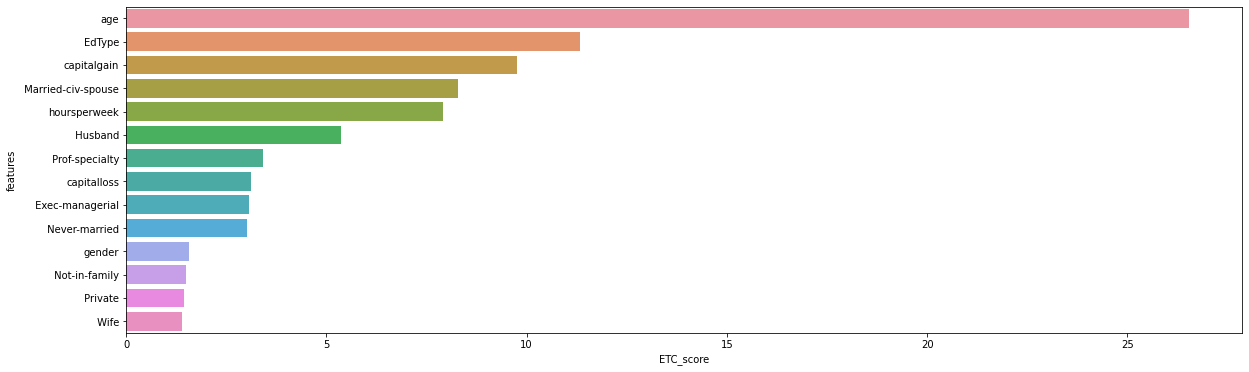

In [89]:
plt.figure(figsize = (20, 6))

sns.barplot(x = "ETC_score", y = "features", data = q)

print(Final_score_ETC.nlargest(14, "ETC_score")) 

In [90]:
top_features = [i for i in q["features"]]
top_features

['age',
 'EdType',
 'capitalgain',
 ' Married-civ-spouse',
 'hoursperweek',
 ' Husband',
 ' Prof-specialty',
 'capitalloss',
 ' Exec-managerial',
 ' Never-married',
 'gender',
 ' Not-in-family',
 ' Private',
 ' Wife']

In [91]:
len(top_features)

14

# Feature Scaling

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler = StandardScaler()

In [94]:
x = df_o[top_features]    # independent variables
x.head()

age  EdType  capitalgain   Married-civ-spouse  hoursperweek   Husband  \
1   24       9            0                    0            40         0   
2   44      13            0                    1            40         1   
3   27       5            0                    0            40         0   
4   20      13            0                    0            35         0   
5   44       9            0                    0            40         0   

    Prof-specialty  capitalloss   Exec-managerial   Never-married  gender  \
1                0            0                 0               1       0   
2                1            0                 0               0       0   
3                0            0                 0               1       0   
4                0            0                 0               1       0   
5                0            0                 1               0       1   

    Not-in-family   Private   Wife  
1               0         0      0  
2               0         1      0  
3               0         1      0  
4               1         1      0  
5               0         1      0

In [95]:
df_scaled = scaler.fit_transform(x)
df_scaled

array([[-1.23441125, -0.6169873 , -0.14839215, ..., -0.59748663,
        -1.78428723, -0.22264   ],
       [ 0.41875259,  0.85806725, -0.14839215, ..., -0.59748663,
         0.56044788, -0.22264   ],
       [-0.98643667, -2.09204185, -0.14839215, ..., -0.59748663,
         0.56044788, -0.22264   ],
       ...,
       [-1.31706944,  0.85806725, -0.14839215, ..., -0.59748663,
         0.56044788, -0.22264   ],
       [ 0.2534362 ,  0.85806725, -0.14839215, ..., -0.59748663,
        -1.78428723,  4.49155586],
       [-0.82112029,  0.85806725, -0.14839215, ...,  1.67367763,
         0.56044788, -0.22264   ]])

# BUILD LOGISTICS REGRESSION MODEL

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
y = df_o["SalStat"]     # dependent variable
y.head()

1    0
2    1
3    0
4    0
5    0
Name: SalStat, dtype: int64

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(df_scaled, y, test_size = 0.25, random_state = 0)

In [100]:
lr = LogisticRegression()

log_model = lr.fit(X_train, Y_train)
log_model

LogisticRegression()

In [101]:
log_model.coef_ * 100     # percentage of scores (importance of features)

array([[ 39.93223734,  64.07205003, 233.60463416,  62.23047081,
         23.58293956,  47.5592476 ,  33.52981978,  26.51444055,
         30.31051508, -21.78553365, -38.46001949,  24.51031687,
          3.08641938,  46.30625394]])

In [102]:
log_model.intercept_

array([-1.65331325])

In [103]:
lr.score(X_train, Y_train)   # the model is able to understand 83% of the features while training

0.833654014343187

In [104]:
lr.score(X_test, Y_test)      # the model is able to understand 83% of the features  while testing

0.835053349658912

Here, the  score for training and testing are almost similar, so the model doesn't have any problem of overfitting or underfitting. 

# TEST THE MODEL ON TESTING DATASET

In [105]:
Y_pred = log_model.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [106]:
y_test = pd.DataFrame(Y_test)
y_test.head()

SalStat
31885        0
28901        0
13677        0
25459        0
27299        1

In [107]:
y_test.columns = ["actual_value"]
y_test.head()

actual_value
31885             0
28901             0
13677             0
25459             0
27299             1

In [108]:
y_pred = pd.DataFrame(Y_pred)
y_pred.head()

0
0  0
1  0
2  0
3  0
4  1

In [109]:
y_pred.columns = ["predicted_value"]
y_pred.head()

predicted_value
0                0
1                0
2                0
3                0
4                1

In [110]:
y_test = y_test.reset_index(drop = True)
y_test.head()

actual_value
0             0
1             0
2             0
3             0
4             1

In [111]:
final_output = pd.concat([y_test, y_pred], axis = 1, ignore_index = True)
final_output.head()

0  1
0  0  0
1  0  0
2  0  0
3  0  0
4  1  1

In [112]:
pd.set_option("display.max_rows", None)

In [113]:
final_output.columns = ["actual_vale", "predicted_value"]
final_output.head()

actual_vale  predicted_value
0            0                0
1            0                0
2            0                0
3            0                0
4            1                1

In [114]:
Y_test.value_counts()

0    4247
1    1470
Name: SalStat, dtype: int64

In [115]:
from sklearn.metrics import classification_report, confusion_matrix

In [116]:
confusion_matrix(Y_test, Y_pred)

array([[3914,  333],
       [ 610,  860]], dtype=int64)

    3914- True Negative
    333- False Positive
    610- False Negative
    860- True Positive

    In actual, (3914 + 333) = 4247 people are getting salary less than 50k
    In actual, (610 + 860) = 1470 people are getting salary more than 50k

Here, Sensitivity is lower than Specificity

In [117]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4247
           1       0.72      0.59      0.65      1470

    accuracy                           0.84      5717
   macro avg       0.79      0.75      0.77      5717
weighted avg       0.83      0.84      0.83      5717



Recall 0 = Specificity = True Negative / (True Negative + False Positive) = 92% 

Recall 1 = Sensitivity = True Positive / (True Positive + False Negative) = 58% 

Precision(0) = Negative Predicted Value = True Negative / (True Negative +  False Negative) = 87%

Precision(1) = Positive Predicted Value = True Positive / (True Positive + False Positive) = 72% 

The result is giving more negative results (< 50k) and less positive results (> 50k).
So the model is biased towards negative results. 

Precision for negative results is 87%, so the model is biased towards negative results. But as the precision for positive results is 72%, so it is not that biased. 

    macro avg for precision = precision(0) + precision(1)
    macro avg for recall = recall(0) + recall(1)

    weighted avg for precision  = 
    [(in actual, the no. of people getting salary less than 50k / total no. of people) * precision(0)] + 
    [(in actual, the no. of people getting salary more than 50k / total no. of people) * precision(1)]

    = [(4247 / 5717) * .87] + [(1470 / 5717) * .72]
    = .83

    weighted avg for recall  = 
    [(in actual, the no. of people getting salary less than 50k / total no. of people) * recall(0)] + 
    [(in actual, the no. of people getting salary more than 50k / total no. of people) * recall(1)]

    = [(4247 / 5717) * .92] + [(1470 / 5717) * .59]
    = .84

In [118]:
pip install tensorflow-gpu

Note: you may need to restart the kernel to use updated packages.


Text(69.0, 0.5, 'Truth')

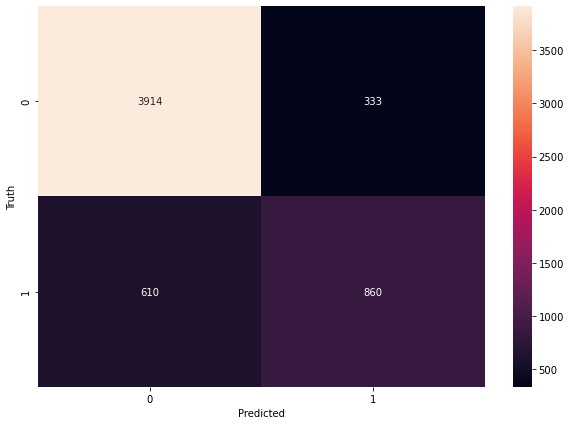

In [119]:
import tensorflow as tf
cm = tf.math.confusion_matrix(labels = Y_test, predictions = Y_pred)

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# HYPER-PARAMETER TUNNING

Hyper Parameter Tuning checks for different threshold values to tune the model

In [120]:
y_prob = lr.predict_proba(X_test)

y_prob

array([[0.98657057, 0.01342943],
       [0.97981835, 0.02018165],
       [0.98130689, 0.01869311],
       ...,
       [0.65119623, 0.34880377],
       [0.98429246, 0.01570754],
       [0.98303933, 0.01696067]])

The first value is the probability of occurring and the second value is the probability of not occurring. 

    If my client is saying that True Positives are very important, then it means Sensitivity is very important. 
    If I can reduce False Negative values, then my threshold value can be decreased. (For example, if we want to decrease the threshold value from .5 to .4)
    But the setback is, after decreasing the threshold value, we will get more False Positive Values. 

In [121]:
prob = pd.DataFrame(y_prob[:, 1], columns = ["sal_probability"])
prob

sal_probability
0            0.013429
1            0.020182
2            0.018693
3            0.018934
4            0.794761
5            0.007024
6            0.513686
7            0.017239
8            0.531739
9            0.552384
10           0.004587
11           0.162563
12           0.300853
13           0.557586
14           0.095007
15           0.009476
16           0.023717
17           0.531739
18           0.013292
19           0.247836
20           0.198253
21           0.030648
22           0.347362
23           0.021313
24           0.591989
25           0.568581
26           0.006771
27           0.197898
28           1.000000
29           0.200475
30           0.021025
31           0.075119
32           0.008876
33           0.024025
34           0.202401
35           0.005736
36           0.022272
37           0.067534
38           0.299122
39           0.006165
40           0.032110
41           0.856105
42           0.207932
43           0.074128
44           0.037072
45           0.077166
46           0.004304
47           0.920044
48           0.401075
49           0.018097
50           0.391393
51           0.006027
52           0.019066
53           0.822114
54           0.014960
55           0.098737
56           0.709083
57           0.114103
58           0.037467
59           0.271997
60           0.798938
61           0.927120
62           0.181346
63           0.013568
64           0.795612
65           0.011322
66           0.186885
67           0.063600
68           0.024348
69           0.049326
70           0.770879
71           0.241100
72           0.005908
73           0.015835
74           0.278006
75           0.171398
76           0.397878
77           0.313549
78           0.999779
79           0.186603
80           0.030867
81           0.006027
82           0.503066
83           0.026368
84           0.976405
85           0.103638
86           0.499387
87           0.572249
88           0.009459
89           0.312311
90           0.374402
91           0.861350
92           0.241734
93           0.034180
94           0.363944
95           0.797564
96           0.005231
97           0.695456
98           0.010194
99           0.998941
100          0.440677
101          0.475972
102          0.213267
103          0.020649
104          0.998527
105          0.988736
106          0.200659
107          0.033820
108          0.053719
109          0.689938
110          0.087183
111          0.920540
112          0.508960
113          0.665494
114          0.825664
115          0.014473
116          0.003766
117          0.383051
118          0.048776
119          0.278885
120          0.637739
121          0.592627
122          0.212203
123          0.013134
124          0.137074
125          0.520010
126          0.050503
127          0.019586
128          0.079360
129          0.039026
130          0.639641
131          0.020935
132          0.599743
133          0.143918
134          0.149213
135          0.021489
136          0.018999
137          0.058465
138          0.053470
139          0.522455
140          0.209507
141          0.027090
142          0.790127
143          0.523513
144          0.018053
145          0.749594
146          0.586439
147          0.786437
148          0.030591
149          0.132143
150          0.260732
151          0.086020
152          0.020270
153          0.132873
154          0.518572
155          0.009132
156          0.639427
157          0.004022
158          0.016688
159          0.278885
160          0.168196
161          0.723452
162          0.654503
163          0.213267
164          0.016898
165          0.021116
166          0.143610
167          0.591096
168          0.993787
169          0.507026
170          0.994781
171          0.106821
172          0.016366
173          0.595081
174          0.489463
175          0.144731
176          0.490524
177          0.017716
178          0.158635
179          0.010749
180          0.436139
18

In [123]:
y = pd.DataFrame(Y_test)
y.columns = ["actual"]
y = y.reset_index(drop = True)

y.head()

actual
0       0
1       0
2       0
3       0
4       1

In [124]:
pred = pd.DataFrame(Y_pred, columns = ["PRED_SAL"])
pred.head()

PRED_SAL
0         0
1         0
2         0
3         0
4         1

In [125]:
model1 = pd.concat([pred, prob, y], axis = 1)
model1.head(10)

PRED_SAL  sal_probability  actual
0         0         0.013429       0
1         0         0.020182       0
2         0         0.018693       0
3         0         0.018934       0
4         1         0.794761       1
5         0         0.007024       0
6         1         0.513686       0
7         0         0.017239       0
8         1         0.531739       1
9         1         0.552384       1

If the new threshold value is changed to 0.66, then the Predicted values will be 1 if the threshold value is greater than 0.66, and the Predicted values will be 0 if the threshold value is below 0.66. 

In [141]:
model1['new_pred_0.66'] = model1['sal_probability'].apply(lambda x: 1 if x > 0.66 else 0)
model1.head()

PRED_SAL  sal_probability  actual  new_pred_0.66
0         0         0.013429       0              0
1         0         0.020182       0              0
2         0         0.018693       0              0
3         0         0.018934       0              0
4         1         0.794761       1              1

In [147]:
print(classification_report(model1['actual'], model1['new_pred_0.66']))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4247
           1       0.82      0.40      0.54      1470

    accuracy                           0.82      5717
   macro avg       0.82      0.69      0.72      5717
weighted avg       0.82      0.82      0.80      5717



# DRAW ROC CURVE

In [126]:
from sklearn.metrics import roc_curve, roc_auc_score

In [128]:
fpr, tpr, thresholds = roc_curve(Y_test, prob)
fpr, thresholds, tpr

print(thresholds, fpr, tpr)

[2.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.23972090e-03
 1.23115609e-03 1.04404713e-03] [0.         0.         0.         ... 0.99905816 0.99952908 1.        ] [0.         0.00340136 0.00748299 ... 1.         1.         1.        ]


In [130]:
auc = roc_auc_score(Y_test, prob)
auc

0.8919801732795779

If we get ROC and AUC curve score more, then our model is showing good understanding of the training dataset.

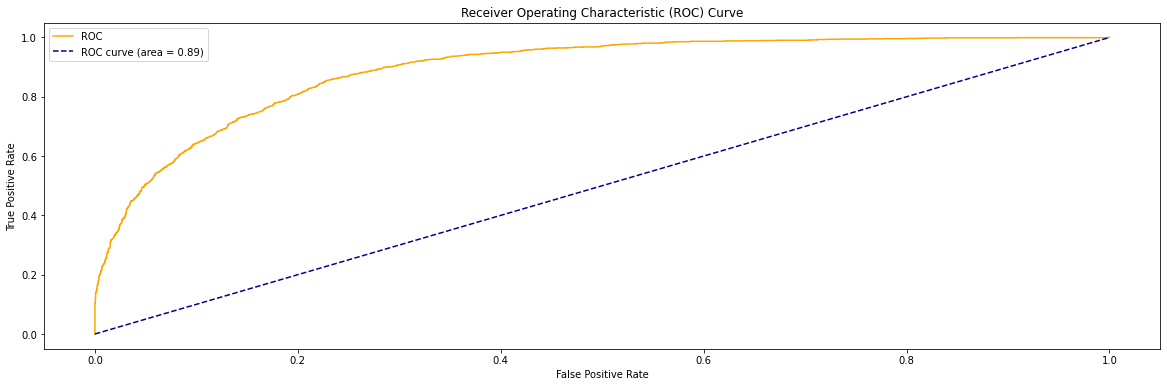

In [131]:
plt.figure(figsize = (20, 6))

plt.plot(fpr, tpr, color = 'orange', label = 'ROC')

plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle = '--', label = 'ROC curve (area = %0.2f)' % auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend()

plt.show()

in this ROC curve, we are getting a curve which is above the ideal line, so we are getting good values.

In [133]:
pd.set_option('display.max_rows', None)

In [137]:
a = pd.DataFrame(fpr)
b = pd.DataFrame(tpr)
c = pd.DataFrame(thresholds)

In [140]:
abc = pd.concat([a, b, c], axis = 1)
abc.columns = ['FPR', 'TPR', 'Threshold']
abc

FPR       TPR  Threshold
0     0.000000  0.000000   2.000000
1     0.000000  0.003401   1.000000
2     0.000000  0.007483   1.000000
3     0.000000  0.010204   1.000000
4     0.000000  0.011565   1.000000
5     0.000000  0.012925   1.000000
6     0.000000  0.014286   1.000000
7     0.000000  0.024490   0.998909
8     0.000000  0.025850   0.998905
9     0.000000  0.031973   0.998365
10    0.000000  0.033333   0.998198
11    0.000000  0.102041   0.951266
12    0.000235  0.102041   0.951123
13    0.000235  0.107483   0.947573
14    0.000471  0.107483   0.947545
15    0.000471  0.123810   0.934407
16    0.000706  0.123810   0.933674
17    0.000706  0.138095   0.920146
18    0.000942  0.138095   0.920044
19    0.000942  0.140136   0.919045
20    0.001177  0.140136   0.918792
21    0.001177  0.142177   0.917433
22    0.001413  0.142177   0.916213
23    0.001413  0.143537   0.915644
24    0.001648  0.143537   0.915367
25    0.001648  0.146259   0.912467
26    0.001884  0.146259   0.912242
27    0.001884  0.147619   0.911395
28    0.001884  0.153061   0.903131
29    0.002119  0.153061   0.902556
30    0.002119  0.161224   0.895357
31    0.002355  0.161224   0.894984
32    0.002355  0.165306   0.888410
33    0.002590  0.165306   0.887914
34    0.002590  0.165986   0.886973
35    0.002826  0.165986   0.886521
36    0.002826  0.168027   0.882893
37    0.003061  0.168027   0.880102
38    0.003061  0.175510   0.864912
39    0.003296  0.175510   0.864684
40    0.003296  0.178231   0.863874
41    0.003532  0.178231   0.863367
42    0.003532  0.180952   0.861052
43    0.003767  0.180952   0.861047
44    0.003767  0.185714   0.856105
45    0.004003  0.185714   0.855923
46    0.004003  0.195238   0.844814
47    0.004238  0.195238   0.844424
48    0.004238  0.197279   0.840264
49    0.004474  0.197279   0.839671
50    0.004709  0.197959   0.839482
51    0.004709  0.198639   0.839116
52    0.004945  0.198639   0.837745
53    0.004945  0.202041   0.832900
54    0.005180  0.202041   0.832223
55    0.005180  0.202721   0.832190
56    0.005651  0.202721   0.830672
57    0.005651  0.204082   0.830636
58    0.005651  0.204762   0.829978
59    0.005651  0.206122   0.829900
60    0.005651  0.207483   0.827383
61    0.005887  0.207483   0.827214
62    0.005887  0.212925   0.824749
63    0.006357  0.212925   0.824271
64    0.006357  0.214286   0.822052
65    0.006593  0.214286   0.821651
66    0.006593  0.219048   0.817750
67    0.006828  0.219048   0.816909
68    0.006828  0.223810   0.815026
69    0.007064  0.223810   0.815024
70    0.007064  0.228571   0.810741
71    0.007299  0.228571   0.810211
72    0.007299  0.229932   0.808973
73    0.007770  0.229932   0.808242
74    0.007770  0.230612   0.807068
75    0.008241  0.230612   0.806387
76    0.008241  0.231973   0.806138
77    0.008241  0.234014   0.802809
78    0.008241  0.235374   0.800927
79    0.008947  0.235374   0.800289
80    0.008947  0.237415   0.799256
81    0.009183  0.237415   0.798938
82    0.009183  0.238776   0.797889
83    0.009418  0.238776   0.797564
84    0.009418  0.239456   0.797087
85    0.009654  0.239456   0.796396
86    0.009654  0.240816   0.796217
87    0.009654  0.242177   0.795612
88    0.009654  0.246939   0.790431
89    0.009889  0.246939   0.790127
90    0.009889  0.247619   0.789968
91    0.010125  0.247619   0.789710
92    0.010125  0.248980   0.788266
93    0.010360  0.248980   0.786437
94    0.010360  0.252381   0.783592
95    0.010596  0.252381   0.783290
96    0.010596  0.254422   0.779398
97    0.010831  0.254422   0.778970
98    0.010831  0.255782   0.778724
99    0.011067  0.255782   0.777039
100   0.011067  0.256463   0.774066
101   0.011302  0.256463   0.773698
102   0.011302  0.257823   0.772728
103   0.011538  0.257823   0.772343
104   0.011538  0.270068   0.763344
105   0.011773  0.270748   0.761979
106   0.011773  0.272109   0.760738
107   0.012479  0.272109   0.759820
108   0.012479  0.276190   0.755227
109   0.012715  0.276190   0.755028
110   0.013186 

Interpreting the table --> At the first row, the threshold value is 2, Sensitivity is 0% (TPR) and Specificity is 100% (1 - FPR). 

# LET'S ASSUME, HERE WE HAVE TO WORK ON FALSE NEGATIVE, STRIVE TO FIND THE OPTIMAL THRESHOLD VALUE WHERE TRUE POSITIVE RATE WILL BE HIGH

In [148]:
from sklearn.metrics import recall_score, accuracy_score

In [153]:
# For every threshold value, if the probability is greater than the threshold value, then put 1, otherwise 0 
# and add its recall values

TPR = []

for i in thresholds:
    y_pred = np.where(prob > i, 1, 0)
    TPR.append(recall_score(Y_test, y_pred))

TPR = pd.Series(TPR)
TPR.head(10)

0    0.000000
1    0.000000
2    0.003401
3    0.007483
4    0.010204
5    0.012245
6    0.012925
7    0.023810
8    0.024490
9    0.031293
dtype: float64

In [155]:
thresholds = pd.Series(thresholds)
thresholds.head(10)

0    2.000000
1    1.000000
2    1.000000
3    1.000000
4    1.000000
5    1.000000
6    1.000000
7    0.998909
8    0.998905
9    0.998365
dtype: float64

In [156]:
TPR_MODEL = pd.concat([TPR, thresholds], axis = 1)
TPR_MODEL.columns = ["recall", "threshold"]
TPR_MODEL

recall  threshold
0     0.000000   2.000000
1     0.000000   1.000000
2     0.003401   1.000000
3     0.007483   1.000000
4     0.010204   1.000000
5     0.012245   1.000000
6     0.012925   1.000000
7     0.023810   0.998909
8     0.024490   0.998905
9     0.031293   0.998365
10    0.031973   0.998198
11    0.101361   0.951266
12    0.102041   0.951123
13    0.106803   0.947573
14    0.107483   0.947545
15    0.123129   0.934407
16    0.123810   0.933674
17    0.137415   0.920146
18    0.138095   0.920044
19    0.139456   0.919045
20    0.140136   0.918792
21    0.141497   0.917433
22    0.142177   0.916213
23    0.142857   0.915644
24    0.143537   0.915367
25    0.145578   0.912467
26    0.146259   0.912242
27    0.146259   0.911395
28    0.152381   0.903131
29    0.153061   0.902556
30    0.160544   0.895357
31    0.161224   0.894984
32    0.164626   0.888410
33    0.165306   0.887914
34    0.165306   0.886973
35    0.165986   0.886521
36    0.167347   0.882893
37    0.168027   0.880102
38    0.174830   0.864912
39    0.175510   0.864684
40    0.177551   0.863874
41    0.178231   0.863367
42    0.180272   0.861052
43    0.180952   0.861047
44    0.185034   0.856105
45    0.185714   0.855923
46    0.194558   0.844814
47    0.195238   0.844424
48    0.196599   0.840264
49    0.197279   0.839671
50    0.197279   0.839482
51    0.197959   0.839116
52    0.198639   0.837745
53    0.201361   0.832900
54    0.202041   0.832223
55    0.202041   0.832190
56    0.202721   0.830672
57    0.202721   0.830636
58    0.204082   0.829978
59    0.204762   0.829900
60    0.206803   0.827383
61    0.207483   0.827214
62    0.212245   0.824749
63    0.212925   0.824271
64    0.213605   0.822052
65    0.214286   0.821651
66    0.218367   0.817750
67    0.219048   0.816909
68    0.223129   0.815026
69    0.223810   0.815024
70    0.227891   0.810741
71    0.228571   0.810211
72    0.229252   0.808973
73    0.229932   0.808242
74    0.229932   0.807068
75    0.230612   0.806387
76    0.230612   0.806138
77    0.233333   0.802809
78    0.234014   0.800927
79    0.235374   0.800289
80    0.236735   0.799256
81    0.237415   0.798938
82    0.238095   0.797889
83    0.238776   0.797564
84    0.238776   0.797087
85    0.239456   0.796396
86    0.240136   0.796217
87    0.240816   0.795612
88    0.246259   0.790431
89    0.246939   0.790127
90    0.246939   0.789968
91    0.247619   0.789710
92    0.248299   0.788266
93    0.248980   0.786437
94    0.251701   0.783592
95    0.252381   0.783290
96    0.253741   0.779398
97    0.254422   0.778970
98    0.255102   0.778724
99    0.255782   0.777039
100   0.255782   0.774066
101   0.256463   0.773698
102   0.257143   0.772728
103   0.257823   0.772343
104   0.269388   0.763344
105   0.270068   0.761979
106   0.271429   0.760738
107   0.272109   0.759820
108   0.275510   0.755227
109   0.276190   0.755028
110   0.276190   0.754511
111   0.277551   0.750700
112   0.278231   0.750446
113   0.279592   0.749594
114   0.280272   0.749328
115   0.281633   0.749250
116   0.282313   0.748994
117   0.285034   0.748062
118   0.285714   0.747147
119   0.287755   0.746452
120   0.288435   0.745883
121   0.289116   0.744552
122   0.289116   0.744214
123   0.289796   0.744192
124   0.292517   0.743006
125   0.293197   0.743003
126   0.294558   0.742738
127   0.295238   0.742079
128   0.298639   0.739153
129   0.299320   0.738889
130   0.302041   0.737924
131   0.302721   0.737880
132   0.306803   0.735145
133   0.307483   0.734687
134   0.308844   0.733493
135   0.309524   0.731712
136   0.310884   0.730685
137   0.311565   0.729832
138   0.315646   0.726309
139   0.316327   0.726027
140   0.316327   0.725858
141   0.317007   0.725838
142   0.317687   0.725183
143   0.318367   0.724860
144   0.318367   0.724688
145   0.319048   0.724357
146   0.319048   0.723644
147   0.319728   0.723452
148   0.320408   0.723367
149   0.321769   0.723286
150   0.322449   0.722955
151   0.322449   0.722677
152   0.324490   0.721402
153 

In [157]:
TPR_MODEL.sort_values(by = "recall", ascending = False, inplace = True)
TPR_MODEL

recall  threshold
1919  1.000000   0.001044
1918  1.000000   0.001231
1917  1.000000   0.001240
1855  0.999320   0.006587
1844  0.999320   0.007256
1845  0.999320   0.007230
1846  0.999320   0.007222
1847  0.999320   0.007203
1848  0.999320   0.007193
1850  0.999320   0.007111
1851  0.999320   0.007101
1852  0.999320   0.006771
1853  0.999320   0.006771
1854  0.999320   0.006626
1857  0.999320   0.006369
1856  0.999320   0.006405
1842  0.999320   0.007504
1858  0.999320   0.006341
1859  0.999320   0.006298
1860  0.999320   0.006228
1861  0.999320   0.006214
1862  0.999320   0.006165
1863  0.999320   0.006164
1864  0.999320   0.006050
1865  0.999320   0.006027
1866  0.999320   0.005783
1843  0.999320   0.007296
1841  0.999320   0.007505
1868  0.999320   0.005737
1840  0.999320   0.007719
1819  0.999320   0.008635
1820  0.999320   0.008605
1821  0.999320   0.008591
1822  0.999320   0.008576
1823  0.999320   0.008537
1824  0.999320   0.008426
1825  0.999320   0.008377
1826  0.999320   0.008355
1827  0.999320   0.008314
1828  0.999320   0.008300
1829  0.999320   0.008278
1830  0.999320   0.008242
1831  0.999320   0.008228
1832  0.999320   0.008211
1833  0.999320   0.008144
1834  0.999320   0.008095
1835  0.999320   0.008005
1836  0.999320   0.007996
1837  0.999320   0.007887
1838  0.999320   0.007881
1839  0.999320   0.007733
1867  0.999320   0.005772
1849  0.999320   0.007171
1869  0.999320   0.005736
1905  0.999320   0.003749
1895  0.999320   0.004142
1896  0.999320   0.004130
1897  0.999320   0.004070
1898  0.999320   0.004037
1899  0.999320   0.004025
1900  0.999320   0.004022
1901  0.999320   0.003931
1902  0.999320   0.003892
1903  0.999320   0.003780
1904  0.999320   0.003766
1906  0.999320   0.003644
1893  0.999320   0.004172
1907  0.999320   0.003395
1908  0.999320   0.003391
1909  0.999320   0.002760
1910  0.999320   0.002741
1911  0.999320   0.002589
1912  0.999320   0.002417
1870  0.999320   0.005700
1914  0.999320   0.002156
1915  0.999320   0.002095
1916  0.999320   0.002082
1894  0.999320   0.004156
1913  0.999320   0.002390
1892  0.999320   0.004189
1881  0.999320   0.004917
1891  0.999320   0.004295
1871  0.999320   0.005586
1873  0.999320   0.005373
1874  0.999320   0.005326
1875  0.999320   0.005322
1876  0.999320   0.005231
1877  0.999320   0.005062
1878  0.999320   0.005030
1879  0.999320   0.005014
1880  0.999320   0.005005
1872  0.999320   0.005382
1882  0.999320   0.004898
1887  0.999320   0.004587
1883  0.999320   0.004896
1888  0.999320   0.004502
1889  0.999320   0.004439
1886  0.999320   0.004594
1885  0.999320   0.004740
1884  0.999320   0.004780
1890  0.999320   0.004302
1758  0.998639   0.011322
1759  0.998639   0.011311
1766  0.998639   0.010978
1760  0.998639   0.011292
1761  0.998639   0.011185
1762  0.998639   0.011176
1763  0.998639   0.011109
1764  0.998639   0.011061
1765  0.998639   0.010995
1770  0.998639   0.010799
1767  0.998639   0.010976
1768  0.998639   0.010930
1769  0.998639   0.010835
1771  0.998639   0.010749
1772  0.998639   0.010706
1773  0.998639   0.010687
1774  0.998639   0.010644
1756  0.998639   0.011368
1775  0.998639   0.010625
1757  0.998639   0.011342
1745  0.998639   0.011929
1755  0.998639   0.011521
1743  0.998639   0.012054
1777  0.998639   0.010512
1736  0.998639   0.012231
1737  0.998639   0.012198
1738  0.998639   0.012152
1739  0.998639   0.012125
1740  0.998639   0.012106
1741  0.998639   0.012100
1742  0.998639   0.012099
1744  0.998639   0.011980
1754  0.998639   0.011528
1746  0.998639   0.011923
1747  0.998639   0.011910
1748  0.998639   0.011727
1749  0.998639   0.011718
1750  0.998639   0.011667
1751  0.998639   0.011667
1752  0.998639   0.011594
1753  0.998639   0.011537
1776  0.998639   0.010532
1799  0.998639   0.009531
1778  0.998639   0.010452
1798  0.998639   0.009549
1801  0.998639   0.009359
1802  0.998639   0.009323
1804  0.998639   0.009282
1805  0.998639   0.009227
1806  0.998639   0.009172
1807  0.998639   0.009132
1808  0.998639   0.009073
1809

In [158]:
TPR_MODEL.reset_index()

index    recall  threshold
0      1919  1.000000   0.001044
1      1918  1.000000   0.001231
2      1917  1.000000   0.001240
3      1855  0.999320   0.006587
4      1844  0.999320   0.007256
5      1845  0.999320   0.007230
6      1846  0.999320   0.007222
7      1847  0.999320   0.007203
8      1848  0.999320   0.007193
9      1850  0.999320   0.007111
10     1851  0.999320   0.007101
11     1852  0.999320   0.006771
12     1853  0.999320   0.006771
13     1854  0.999320   0.006626
14     1857  0.999320   0.006369
15     1856  0.999320   0.006405
16     1842  0.999320   0.007504
17     1858  0.999320   0.006341
18     1859  0.999320   0.006298
19     1860  0.999320   0.006228
20     1861  0.999320   0.006214
21     1862  0.999320   0.006165
22     1863  0.999320   0.006164
23     1864  0.999320   0.006050
24     1865  0.999320   0.006027
25     1866  0.999320   0.005783
26     1843  0.999320   0.007296
27     1841  0.999320   0.007505
28     1868  0.999320   0.005737
29     1840  0.999320   0.007719
30     1819  0.999320   0.008635
31     1820  0.999320   0.008605
32     1821  0.999320   0.008591
33     1822  0.999320   0.008576
34     1823  0.999320   0.008537
35     1824  0.999320   0.008426
36     1825  0.999320   0.008377
37     1826  0.999320   0.008355
38     1827  0.999320   0.008314
39     1828  0.999320   0.008300
40     1829  0.999320   0.008278
41     1830  0.999320   0.008242
42     1831  0.999320   0.008228
43     1832  0.999320   0.008211
44     1833  0.999320   0.008144
45     1834  0.999320   0.008095
46     1835  0.999320   0.008005
47     1836  0.999320   0.007996
48     1837  0.999320   0.007887
49     1838  0.999320   0.007881
50     1839  0.999320   0.007733
51     1867  0.999320   0.005772
52     1849  0.999320   0.007171
53     1869  0.999320   0.005736
54     1905  0.999320   0.003749
55     1895  0.999320   0.004142
56     1896  0.999320   0.004130
57     1897  0.999320   0.004070
58     1898  0.999320   0.004037
59     1899  0.999320   0.004025
60     1900  0.999320   0.004022
61     1901  0.999320   0.003931
62     1902  0.999320   0.003892
63     1903  0.999320   0.003780
64     1904  0.999320   0.003766
65     1906  0.999320   0.003644
66     1893  0.999320   0.004172
67     1907  0.999320   0.003395
68     1908  0.999320   0.003391
69     1909  0.999320   0.002760
70     1910  0.999320   0.002741
71     1911  0.999320   0.002589
72     1912  0.999320   0.002417
73     1870  0.999320   0.005700
74     1914  0.999320   0.002156
75     1915  0.999320   0.002095
76     1916  0.999320   0.002082
77     1894  0.999320   0.004156
78     1913  0.999320   0.002390
79     1892  0.999320   0.004189
80     1881  0.999320   0.004917
81     1891  0.999320   0.004295
82     1871  0.999320   0.005586
83     1873  0.999320   0.005373
84     1874  0.999320   0.005326
85     1875  0.999320   0.005322
86     1876  0.999320   0.005231
87     1877  0.999320   0.005062
88     1878  0.999320   0.005030
89     1879  0.999320   0.005014
90     1880  0.999320   0.005005
91     1872  0.999320   0.005382
92     1882  0.999320   0.004898
93     1887  0.999320   0.004587
94     1883  0.999320   0.004896
95     1888  0.999320   0.004502
96     1889  0.999320   0.004439
97     1886  0.999320   0.004594
98     1885  0.999320   0.004740
99     1884  0.999320   0.004780
100    1890  0.999320   0.004302
101    1758  0.998639   0.011322
102    1759  0.998639   0.011311
103    1766  0.998639   0.010978
104    1760  0.998639   0.011292
105    1761  0.998639   0.011185
106    1762  0.998639   0.011176
107    1763  0.998639   0.011109
108    1764  0.998639   0.011061
109    1765  0.998639   0.010995
110    1770  0.998639   0.010799
111    1767  0.998639   0.010976
112    1768  0.998639   0.010930
113    1769  0.998639   0.010835
114    1771  0.998639   0.010749
115    1772  0.998639   0.010706
116    1773  0.998639   0.010687
117    1774  0.998639   0.010644
118    1756  0.998639   0.011368
119    1775  0.998639   0.010625
120    1757  

In [159]:
# For every threshold value, if the probability is greater than the threshold value, then put 1, otherwise 0 
# and add its accuracy scores

ACC = []

for i in thresholds:
    y_pred1 = np.where(prob > i, 1, 0)
    ACC.append(accuracy_score(Y_test, y_pred1))
    
ACC

[0.7428721357355256,
 0.7428721357355256,
 0.7437467203078537,
 0.7447962217946476,
 0.7454958894525101,
 0.746020640195907,
 0.7461955571103726,
 0.7489942277418227,
 0.7491691446562883,
 0.7509183138009445,
 0.7510932307154102,
 0.7689347559909043,
 0.7691096729053699,
 0.7701591743921637,
 0.7703340913066293,
 0.7741822634248732,
 0.7743571803393389,
 0.7776806017141857,
 0.7778555186286514,
 0.778030435543117,
 0.7782053524575826,
 0.7783802693720483,
 0.7785551862865139,
 0.7785551862865139,
 0.7787301032009796,
 0.7790799370299107,
 0.7792548539443764,
 0.7790799370299107,
 0.7806541892601014,
 0.7808291061745671,
 0.7825782753192234,
 0.782753192233689,
 0.7834528598915516,
 0.7836277768060171,
 0.7834528598915516,
 0.7836277768060171,
 0.7838026937204827,
 0.7839776106349484,
 0.785551862865139,
 0.7857267797796047,
 0.786076613608536,
 0.7862515305230016,
 0.7866013643519328,
 0.7867762812663984,
 0.7876508658387266,
 0.7878257827531923,
 0.7899247857267798,
 0.790099702641245

In [160]:
acc_score = pd.DataFrame(ACC, columns = ["accuracy"])
acc_score 

accuracy
0     0.742872
1     0.742872
2     0.743747
3     0.744796
4     0.745496
5     0.746021
6     0.746196
7     0.748994
8     0.749169
9     0.750918
10    0.751093
11    0.768935
12    0.769110
13    0.770159
14    0.770334
15    0.774182
16    0.774357
17    0.777681
18    0.777856
19    0.778030
20    0.778205
21    0.778380
22    0.778555
23    0.778555
24    0.778730
25    0.779080
26    0.779255
27    0.779080
28    0.780654
29    0.780829
30    0.782578
31    0.782753
32    0.783453
33    0.783628
34    0.783453
35    0.783628
36    0.783803
37    0.783978
38    0.785552
39    0.785727
40    0.786077
41    0.786252
42    0.786601
43    0.786776
44    0.787651
45    0.787826
46    0.789925
47    0.790100
48    0.790275
49    0.790450
50    0.790275
51    0.790275
52    0.790450
53    0.790974
54    0.791149
55    0.790974
56    0.790974
57    0.790799
58    0.791149
59    0.791324
60    0.791849
61    0.792024
62    0.793073
63    0.793073
64    0.793073
65    0.793248
66    0.794123
67    0.794298
68    0.795172
69    0.795347
70    0.796222
71    0.796397
72    0.796397
73    0.796397
74    0.796222
75    0.796222
76    0.796047
77    0.796747
78    0.796921
79    0.796921
80    0.797096
81    0.797271
82    0.797271
83    0.797446
84    0.797271
85    0.797446
86    0.797446
87    0.797621
88    0.799020
89    0.799195
90    0.799020
91    0.799195
92    0.799195
93    0.799370
94    0.799895
95    0.800070
96    0.800245
97    0.800420
98    0.800420
99    0.800595
100   0.800420
101   0.800595
102   0.800595
103   0.800770
104   0.803568
105   0.803743
106   0.803918
107   0.803743
108   0.804443
109   0.804618
110   0.804443
111   0.804443
112   0.804618
113   0.804968
114   0.805143
115   0.805492
116   0.805667
117   0.806367
118   0.806542
119   0.806892
120   0.806892
121   0.806717
122   0.806542
123   0.806717
124   0.807242
125   0.807416
126   0.807591
127   0.807766
128   0.808466
129   0.808641
130   0.809341
131   0.809515
132   0.810565
133   0.810740
134   0.810915
135   0.811090
136   0.811265
137   0.811440
138   0.812314
139   0.812489
140   0.812314
141   0.812489
142   0.812489
143   0.812489
144   0.812314
145   0.812489
146   0.812314
147   0.812489
148   0.812489
149   0.812489
150   0.812664
151   0.812489
152   0.812664
153   0.812839
154   0.813539
155   0.813713
156   0.813713
157   0.813539
158   0.813713
159   0.814063
160   0.814238
161   0.814238
162   0.814238
163   0.814063
164   0.814238
165   0.814238
166   0.814413
167   0.814238
168   0.814413
169   0.815113
170   0.815288
171   0.815113
172   0.814763
173   0.814938
174   0.814763
175   0.814938
176   0.814763
177   0.814763
178   0.814938
179   0.815113
180   0.815113
181   0.815288
182   0.815638
183   0.815463
184   0.815463
185   0.815638
186   0.815812
187   0.815638
188   0.815812
189   0.816162
190   0.815987
191   0.816162
192   0.816862
193   0.817037
194   0.817387
195   0.817562
196   0.818086
197   0.818261
198   0.818261
199   0.818436
200   0.818261
201   0.819136
202   0.819311
203   0.819136
204   0.819486
205   0.819486
206   0.819311
207   0.819486
208   0.819486
209   0.819661
210   0.819836
211   0.819836
212   0.819836
213   0.820010
214   0.821235
215   0.821410
216   0.821235
217   0.821935
218   0.822109
219   0.821935
220   0.822109
221   0.821935
222   0.822109
223   0.822284
224   0.822459
225   0.822284
226   0.822284
227   0.822459
228   0.822284
229   0.822459
230   0.822284
231   0.822284
232   0.822284
233   0.822459
234   0.822459
235   0.822634
236   0.822809
237   0.822984
238   0.822984
239   0.823159
240   0.823334
241   0.823509
242   0.824209
243   0.824383
244   0.824209
245   0.824383
246   0.824383
247   0.824558
248   0.824558
249   0.824733
250   0.825783
251   0.825958
252   0.826133
253   0.826308
254   0.827007
255   0.827182
256   0.827707
257   0.827882
258   0.827882
259   0.828057
260   0.827707
261   0.827532
262   0.828232
263   0.828407
264   0.828407
265   0.828756
2

In [162]:
acc_model = pd.concat([acc_score, pd.DataFrame(thresholds, columns = ["threshold"])], axis = 1)
acc_model

accuracy  threshold
0     0.742872   2.000000
1     0.742872   1.000000
2     0.743747   1.000000
3     0.744796   1.000000
4     0.745496   1.000000
5     0.746021   1.000000
6     0.746196   1.000000
7     0.748994   0.998909
8     0.749169   0.998905
9     0.750918   0.998365
10    0.751093   0.998198
11    0.768935   0.951266
12    0.769110   0.951123
13    0.770159   0.947573
14    0.770334   0.947545
15    0.774182   0.934407
16    0.774357   0.933674
17    0.777681   0.920146
18    0.777856   0.920044
19    0.778030   0.919045
20    0.778205   0.918792
21    0.778380   0.917433
22    0.778555   0.916213
23    0.778555   0.915644
24    0.778730   0.915367
25    0.779080   0.912467
26    0.779255   0.912242
27    0.779080   0.911395
28    0.780654   0.903131
29    0.780829   0.902556
30    0.782578   0.895357
31    0.782753   0.894984
32    0.783453   0.888410
33    0.783628   0.887914
34    0.783453   0.886973
35    0.783628   0.886521
36    0.783803   0.882893
37    0.783978   0.880102
38    0.785552   0.864912
39    0.785727   0.864684
40    0.786077   0.863874
41    0.786252   0.863367
42    0.786601   0.861052
43    0.786776   0.861047
44    0.787651   0.856105
45    0.787826   0.855923
46    0.789925   0.844814
47    0.790100   0.844424
48    0.790275   0.840264
49    0.790450   0.839671
50    0.790275   0.839482
51    0.790275   0.839116
52    0.790450   0.837745
53    0.790974   0.832900
54    0.791149   0.832223
55    0.790974   0.832190
56    0.790974   0.830672
57    0.790799   0.830636
58    0.791149   0.829978
59    0.791324   0.829900
60    0.791849   0.827383
61    0.792024   0.827214
62    0.793073   0.824749
63    0.793073   0.824271
64    0.793073   0.822052
65    0.793248   0.821651
66    0.794123   0.817750
67    0.794298   0.816909
68    0.795172   0.815026
69    0.795347   0.815024
70    0.796222   0.810741
71    0.796397   0.810211
72    0.796397   0.808973
73    0.796397   0.808242
74    0.796222   0.807068
75    0.796222   0.806387
76    0.796047   0.806138
77    0.796747   0.802809
78    0.796921   0.800927
79    0.796921   0.800289
80    0.797096   0.799256
81    0.797271   0.798938
82    0.797271   0.797889
83    0.797446   0.797564
84    0.797271   0.797087
85    0.797446   0.796396
86    0.797446   0.796217
87    0.797621   0.795612
88    0.799020   0.790431
89    0.799195   0.790127
90    0.799020   0.789968
91    0.799195   0.789710
92    0.799195   0.788266
93    0.799370   0.786437
94    0.799895   0.783592
95    0.800070   0.783290
96    0.800245   0.779398
97    0.800420   0.778970
98    0.800420   0.778724
99    0.800595   0.777039
100   0.800420   0.774066
101   0.800595   0.773698
102   0.800595   0.772728
103   0.800770   0.772343
104   0.803568   0.763344
105   0.803743   0.761979
106   0.803918   0.760738
107   0.803743   0.759820
108   0.804443   0.755227
109   0.804618   0.755028
110   0.804443   0.754511
111   0.804443   0.750700
112   0.804618   0.750446
113   0.804968   0.749594
114   0.805143   0.749328
115   0.805492   0.749250
116   0.805667   0.748994
117   0.806367   0.748062
118   0.806542   0.747147
119   0.806892   0.746452
120   0.806892   0.745883
121   0.806717   0.744552
122   0.806542   0.744214
123   0.806717   0.744192
124   0.807242   0.743006
125   0.807416   0.743003
126   0.807591   0.742738
127   0.807766   0.742079
128   0.808466   0.739153
129   0.808641   0.738889
130   0.809341   0.737924
131   0.809515   0.737880
132   0.810565   0.735145
133   0.810740   0.734687
134   0.810915   0.733493
135   0.811090   0.731712
136   0.811265   0.730685
137   0.811440   0.729832
138   0.812314   0.726309
139   0.812489   0.726027
140   0.812314   0.725858
141   0.812489   0.725838
142   0.812489   0.725183
143   0.812489   0.724860
144   0.812314   0.724688
145   0.812489   0.724357
146   0.812314   0.723644
147   0.812489   0.723452
148   0.812489   0.723367
149   0.812489   0.723286
150   0.812664   0.722955
151   0.812489   0.722677
152   0.812664   0.721402
15

In [163]:
acc_model.sort_values(by = "accuracy", ascending = False, inplace = True)
acc_model

accuracy  threshold
408   0.837677   0.550052
406   0.837677   0.551406
405   0.837677   0.551710
409   0.837502   0.549671
407   0.837502   0.550919
412   0.837327   0.543939
410   0.837152   0.545066
413   0.837152   0.543228
411   0.837152   0.544313
415   0.836977   0.540799
397   0.836977   0.556297
414   0.836977   0.541870
396   0.836803   0.556508
402   0.836803   0.553841
404   0.836803   0.552654
416   0.836628   0.540073
510   0.836628   0.482624
424   0.836628   0.535027
426   0.836628   0.534304
432   0.836628   0.530845
403   0.836628   0.553157
401   0.836628   0.553852
400   0.836628   0.555369
398   0.836628   0.555926
422   0.836453   0.535884
436   0.836453   0.526807
437   0.836453   0.525447
511   0.836453   0.482278
427   0.836453   0.533665
425   0.836453   0.534965
441   0.836453   0.523858
423   0.836453   0.535382
439   0.836453   0.524722
509   0.836453   0.483489
417   0.836453   0.539551
506   0.836453   0.487401
399   0.836453   0.555917
433   0.836278   0.529275
442   0.836278   0.523513
438   0.836278   0.525443
507   0.836278   0.486670
435   0.836278   0.527550
505   0.836278   0.487601
420   0.836278   0.537115
421   0.836278   0.535947
430   0.836278   0.532187
418   0.836278   0.538405
419   0.836278   0.537352
440   0.836278   0.524478
431   0.836103   0.531739
395   0.836103   0.557545
434   0.836103   0.527709
512   0.836103   0.482184
513   0.836103   0.481571
429   0.836103   0.532702
445   0.835928   0.522624
443   0.835928   0.523157
453   0.835928   0.517206
454   0.835928   0.516986
455   0.835928   0.515639
457   0.835928   0.515273
428   0.835928   0.533431
504   0.835928   0.488331
508   0.835928   0.485515
514   0.835928   0.480692
394   0.835928   0.557551
393   0.835928   0.557586
444   0.835753   0.522793
460   0.835753   0.513686
446   0.835753   0.522455
447   0.835753   0.521828
449   0.835753   0.520010
451   0.835753   0.518572
359   0.835753   0.580584
456   0.835753   0.515619
458   0.835753   0.515069
452   0.835753   0.517617
488   0.835753   0.498690
503   0.835753   0.488604
461   0.835578   0.513518
357   0.835578   0.581466
525   0.835578   0.471667
489   0.835578   0.496163
490   0.835578   0.493381
450   0.835578   0.519044
523   0.835578   0.473385
448   0.835578   0.520874
360   0.835578   0.578939
459   0.835578   0.514392
522   0.835578   0.474388
520   0.835578   0.475251
501   0.835578   0.489903
502   0.835578   0.489463
392   0.835578   0.558207
515   0.835578   0.480203
487   0.835578   0.498774
521   0.835403   0.474735
519   0.835403   0.475972
498   0.835403   0.490870
500   0.835403   0.490185
492   0.835403   0.493160
524   0.835403   0.472065
491   0.835403   0.493334
516   0.835403   0.479670
486   0.835403   0.498972
362   0.835403   0.577162
556   0.835403   0.450395
391   0.835403   0.558839
353   0.835403   0.584360
354   0.835403   0.583694
358   0.835403   0.581392
361   0.835403   0.578151
356   0.835403   0.581495
466   0.835403   0.510327
526   0.835403   0.471658
386   0.835228   0.563144
385   0.835228   0.564058
517   0.835228   0.479040
387   0.835228   0.562197
381   0.835228   0.566964
518   0.835228   0.476894
388   0.835228   0.560633
390   0.835228   0.559556
527   0.835228   0.469852
557   0.835228   0.449780
485   0.835228   0.499121
494   0.835228   0.492354
499   0.835228   0.490524
464   0.835228   0.511189
344   0.835228   0.591794
345   0.835228   0.591092
351   0.835228   0.584872
355   0.835228   0.582766
363   0.835228   0.576597
497   0.835228   0.491152
555   0.835228   0.450527
462   0.835228   0.511767
493   0.835228   0.492458
554   0.835228   0.451073
379   0.835228   0.567404
496   0.835228   0.491491
375   0.835053   0.572249
380   0.835053   0.567120
365   0.835053   0.575049
384   0.835053   0.564429
364   0.835053   0.575756
378   0.835053   0.568519
352   0.835053   0.584634
389   0.835053   0.560405
350   0.835053   0.586127
346   0.835053   0.590472
382   0.835053   0.566330
343   0.835053   0.591989
46

In [164]:
acc_model = acc_model.reset_index()
acc_model

index  accuracy  threshold
0       408  0.837677   0.550052
1       406  0.837677   0.551406
2       405  0.837677   0.551710
3       409  0.837502   0.549671
4       407  0.837502   0.550919
5       412  0.837327   0.543939
6       410  0.837152   0.545066
7       413  0.837152   0.543228
8       411  0.837152   0.544313
9       415  0.836977   0.540799
10      397  0.836977   0.556297
11      414  0.836977   0.541870
12      396  0.836803   0.556508
13      402  0.836803   0.553841
14      404  0.836803   0.552654
15      416  0.836628   0.540073
16      510  0.836628   0.482624
17      424  0.836628   0.535027
18      426  0.836628   0.534304
19      432  0.836628   0.530845
20      403  0.836628   0.553157
21      401  0.836628   0.553852
22      400  0.836628   0.555369
23      398  0.836628   0.555926
24      422  0.836453   0.535884
25      436  0.836453   0.526807
26      437  0.836453   0.525447
27      511  0.836453   0.482278
28      427  0.836453   0.533665
29      425  0.836453   0.534965
30      441  0.836453   0.523858
31      423  0.836453   0.535382
32      439  0.836453   0.524722
33      509  0.836453   0.483489
34      417  0.836453   0.539551
35      506  0.836453   0.487401
36      399  0.836453   0.555917
37      433  0.836278   0.529275
38      442  0.836278   0.523513
39      438  0.836278   0.525443
40      507  0.836278   0.486670
41      435  0.836278   0.527550
42      505  0.836278   0.487601
43      420  0.836278   0.537115
44      421  0.836278   0.535947
45      430  0.836278   0.532187
46      418  0.836278   0.538405
47      419  0.836278   0.537352
48      440  0.836278   0.524478
49      431  0.836103   0.531739
50      395  0.836103   0.557545
51      434  0.836103   0.527709
52      512  0.836103   0.482184
53      513  0.836103   0.481571
54      429  0.836103   0.532702
55      445  0.835928   0.522624
56      443  0.835928   0.523157
57      453  0.835928   0.517206
58      454  0.835928   0.516986
59      455  0.835928   0.515639
60      457  0.835928   0.515273
61      428  0.835928   0.533431
62      504  0.835928   0.488331
63      508  0.835928   0.485515
64      514  0.835928   0.480692
65      394  0.835928   0.557551
66      393  0.835928   0.557586
67      444  0.835753   0.522793
68      460  0.835753   0.513686
69      446  0.835753   0.522455
70      447  0.835753   0.521828
71      449  0.835753   0.520010
72      451  0.835753   0.518572
73      359  0.835753   0.580584
74      456  0.835753   0.515619
75      458  0.835753   0.515069
76      452  0.835753   0.517617
77      488  0.835753   0.498690
78      503  0.835753   0.488604
79      461  0.835578   0.513518
80      357  0.835578   0.581466
81      525  0.835578   0.471667
82      489  0.835578   0.496163
83      490  0.835578   0.493381
84      450  0.835578   0.519044
85      523  0.835578   0.473385
86      448  0.835578   0.520874
87      360  0.835578   0.578939
88      459  0.835578   0.514392
89      522  0.835578   0.474388
90      520  0.835578   0.475251
91      501  0.835578   0.489903
92      502  0.835578   0.489463
93      392  0.835578   0.558207
94      515  0.835578   0.480203
95      487  0.835578   0.498774
96      521  0.835403   0.474735
97      519  0.835403   0.475972
98      498  0.835403   0.490870
99      500  0.835403   0.490185
100     492  0.835403   0.493160
101     524  0.835403   0.472065
102     491  0.835403   0.493334
103     516  0.835403   0.479670
104     486  0.835403   0.498972
105     362  0.835403   0.577162
106     556  0.835403   0.450395
107     391  0.835403   0.558839
108     353  0.835403   0.584360
109     354  0.835403   0.583694
110     358  0.835403   0.581392
111     361  0.835403   0.578151
112     356  0.835403   0.581495
113     466  0.835403   0.510327
114     526  0.835403   0.471658
115     386  0.835228   0.563144
116     385  0.835228   0.564058
117     517  0.835228   0.479040
118     387  0.835228   0.562197
119     381  0.835228   0.566964
120     518  

In [165]:
new_model = pd.concat([acc_model, TPR_MODEL], axis = 1)
new_model

index  accuracy  threshold    recall  threshold
0       408  0.837677   0.550052  0.000000   2.000000
1       406  0.837677   0.551406  0.000000   1.000000
2       405  0.837677   0.551710  0.003401   1.000000
3       409  0.837502   0.549671  0.007483   1.000000
4       407  0.837502   0.550919  0.010204   1.000000
5       412  0.837327   0.543939  0.012245   1.000000
6       410  0.837152   0.545066  0.012925   1.000000
7       413  0.837152   0.543228  0.023810   0.998909
8       411  0.837152   0.544313  0.024490   0.998905
9       415  0.836977   0.540799  0.031293   0.998365
10      397  0.836977   0.556297  0.031973   0.998198
11      414  0.836977   0.541870  0.101361   0.951266
12      396  0.836803   0.556508  0.102041   0.951123
13      402  0.836803   0.553841  0.106803   0.947573
14      404  0.836803   0.552654  0.107483   0.947545
15      416  0.836628   0.540073  0.123129   0.934407
16      510  0.836628   0.482624  0.123810   0.933674
17      424  0.836628   0.535027  0.137415   0.920146
18      426  0.836628   0.534304  0.138095   0.920044
19      432  0.836628   0.530845  0.139456   0.919045
20      403  0.836628   0.553157  0.140136   0.918792
21      401  0.836628   0.553852  0.141497   0.917433
22      400  0.836628   0.555369  0.142177   0.916213
23      398  0.836628   0.555926  0.142857   0.915644
24      422  0.836453   0.535884  0.143537   0.915367
25      436  0.836453   0.526807  0.145578   0.912467
26      437  0.836453   0.525447  0.146259   0.912242
27      511  0.836453   0.482278  0.146259   0.911395
28      427  0.836453   0.533665  0.152381   0.903131
29      425  0.836453   0.534965  0.153061   0.902556
30      441  0.836453   0.523858  0.160544   0.895357
31      423  0.836453   0.535382  0.161224   0.894984
32      439  0.836453   0.524722  0.164626   0.888410
33      509  0.836453   0.483489  0.165306   0.887914
34      417  0.836453   0.539551  0.165306   0.886973
35      506  0.836453   0.487401  0.165986   0.886521
36      399  0.836453   0.555917  0.167347   0.882893
37      433  0.836278   0.529275  0.168027   0.880102
38      442  0.836278   0.523513  0.174830   0.864912
39      438  0.836278   0.525443  0.175510   0.864684
40      507  0.836278   0.486670  0.177551   0.863874
41      435  0.836278   0.527550  0.178231   0.863367
42      505  0.836278   0.487601  0.180272   0.861052
43      420  0.836278   0.537115  0.180952   0.861047
44      421  0.836278   0.535947  0.185034   0.856105
45      430  0.836278   0.532187  0.185714   0.855923
46      418  0.836278   0.538405  0.194558   0.844814
47      419  0.836278   0.537352  0.195238   0.844424
48      440  0.836278   0.524478  0.196599   0.840264
49      431  0.836103   0.531739  0.197279   0.839671
50      395  0.836103   0.557545  0.197279   0.839482
51      434  0.836103   0.527709  0.197959   0.839116
52      512  0.836103   0.482184  0.198639   0.837745
53      513  0.836103   0.481571  0.201361   0.832900
54      429  0.836103   0.532702  0.202041   0.832223
55      445  0.835928   0.522624  0.202041   0.832190
56      443  0.835928   0.523157  0.202721   0.830672
57      453  0.835928   0.517206  0.202721   0.830636
58      454  0.835928   0.516986  0.204082   0.829978
59      455  0.835928   0.515639  0.204762   0.829900
60      457  0.835928   0.515273  0.206803   0.827383
61      428  0.835928   0.533431  0.207483   0.827214
62      504  0.835928   0.488331  0.212245   0.824749
63      508  0.835928   0.485515  0.212925   0.824271
64      514  0.835928   0.480692  0.213605   0.822052
65      394  0.835928   0.557551  0.214286   0.821651
66      393  0.835928   0.557586  0.218367   0.817750
67      444  0.835753   0.522793  0.219048   0.816909
68      460  0.835753   0.513686  0.223129   0.815026
69      446  0.835753   0.522455  0.223810   0.815024
70      447  0.835753   0.521828  0.227891   0.810741
71      449  0.835753   0.520010  0.228571   0.810211
72      451  0.835753   0.518572  0.229252   0.808973
73      35

In [166]:
new_model.sort_values(by = "accuracy", inplace = True, ascending = False)
new_model

index  accuracy  threshold    recall  threshold
0       408  0.837677   0.550052  0.000000   2.000000
2       405  0.837677   0.551710  0.003401   1.000000
1       406  0.837677   0.551406  0.000000   1.000000
3       409  0.837502   0.549671  0.007483   1.000000
4       407  0.837502   0.550919  0.010204   1.000000
5       412  0.837327   0.543939  0.012245   1.000000
6       410  0.837152   0.545066  0.012925   1.000000
7       413  0.837152   0.543228  0.023810   0.998909
8       411  0.837152   0.544313  0.024490   0.998905
11      414  0.836977   0.541870  0.101361   0.951266
9       415  0.836977   0.540799  0.031293   0.998365
10      397  0.836977   0.556297  0.031973   0.998198
12      396  0.836803   0.556508  0.102041   0.951123
13      402  0.836803   0.553841  0.106803   0.947573
14      404  0.836803   0.552654  0.107483   0.947545
20      403  0.836628   0.553157  0.140136   0.918792
23      398  0.836628   0.555926  0.142857   0.915644
22      400  0.836628   0.555369  0.142177   0.916213
21      401  0.836628   0.553852  0.141497   0.917433
15      416  0.836628   0.540073  0.123129   0.934407
19      432  0.836628   0.530845  0.139456   0.919045
18      426  0.836628   0.534304  0.138095   0.920044
17      424  0.836628   0.535027  0.137415   0.920146
16      510  0.836628   0.482624  0.123810   0.933674
31      423  0.836453   0.535382  0.161224   0.894984
36      399  0.836453   0.555917  0.167347   0.882893
35      506  0.836453   0.487401  0.165986   0.886521
34      417  0.836453   0.539551  0.165306   0.886973
33      509  0.836453   0.483489  0.165306   0.887914
32      439  0.836453   0.524722  0.164626   0.888410
30      441  0.836453   0.523858  0.160544   0.895357
28      427  0.836453   0.533665  0.152381   0.903131
27      511  0.836453   0.482278  0.146259   0.911395
26      437  0.836453   0.525447  0.146259   0.912242
25      436  0.836453   0.526807  0.145578   0.912467
24      422  0.836453   0.535884  0.143537   0.915367
29      425  0.836453   0.534965  0.153061   0.902556
45      430  0.836278   0.532187  0.185714   0.855923
43      420  0.836278   0.537115  0.180952   0.861047
48      440  0.836278   0.524478  0.196599   0.840264
47      419  0.836278   0.537352  0.195238   0.844424
46      418  0.836278   0.538405  0.194558   0.844814
44      421  0.836278   0.535947  0.185034   0.856105
42      505  0.836278   0.487601  0.180272   0.861052
41      435  0.836278   0.527550  0.178231   0.863367
40      507  0.836278   0.486670  0.177551   0.863874
39      438  0.836278   0.525443  0.175510   0.864684
38      442  0.836278   0.523513  0.174830   0.864912
37      433  0.836278   0.529275  0.168027   0.880102
49      431  0.836103   0.531739  0.197279   0.839671
50      395  0.836103   0.557545  0.197279   0.839482
51      434  0.836103   0.527709  0.197959   0.839116
52      512  0.836103   0.482184  0.198639   0.837745
53      513  0.836103   0.481571  0.201361   0.832900
54      429  0.836103   0.532702  0.202041   0.832223
65      394  0.835928   0.557551  0.214286   0.821651
63      508  0.835928   0.485515  0.212925   0.824271
61      428  0.835928   0.533431  0.207483   0.827214
66      393  0.835928   0.557586  0.218367   0.817750
62      504  0.835928   0.488331  0.212245   0.824749
64      514  0.835928   0.480692  0.213605   0.822052
60      457  0.835928   0.515273  0.206803   0.827383
58      454  0.835928   0.516986  0.204082   0.829978
55      445  0.835928   0.522624  0.202041   0.832190
57      453  0.835928   0.517206  0.202721   0.830636
56      443  0.835928   0.523157  0.202721   0.830672
59      455  0.835928   0.515639  0.204762   0.829900
73      359  0.835753   0.580584  0.229932   0.808242
78      503  0.835753   0.488604  0.234014   0.800927
77      488  0.835753   0.498690  0.233333   0.802809
76      452  0.835753   0.517617  0.230612   0.806138
75      458  0.835753   0.515069  0.230612   0.806387
74      456  0.835753   0.515619  0.229932   0.807068
72      45